In [1]:
#%load_ext pycodestyle_magic
#%pycodestyle_on
#%pycodestyle_off

# 1. Présentation générale du jeu de données

> Création du dataFrame **data_train** à partir du fichier d'entrainement <font color='red'>application_train.csv.</font>

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import kernel_ridge
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

sns.set()

missing_values = ["na", "n/a", "--", " "]
data_train = pd.read_csv("application_train.csv",
                         sep=',', na_values=missing_values,
                         low_memory=False)

## a) Affichage des lignes en début de fichier train

In [3]:
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## b) Affichage des colonnes et lignes, ansi que leurs nombres


In [4]:
print("Nombre de lignes du fichier train   : ", data_train.shape[0])
print('Nombre de colonnes du fichier train : ', data_train.shape[1])

Nombre de lignes du fichier train   :  307511
Nombre de colonnes du fichier train :  122


## c) Affichage du nombre de valeurs manquantes pour chaque colonne du fichier train


In [5]:
nb_col_nan = data_train.isnull().sum()
nb_col_nan

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

> On peut définir le pourcentage de données manquantes dans notre dataset :

In [6]:
nb_tot_cells_df = np.product(data_train.shape)
nb_tot_cells_manq = nb_col_nan.sum()

pct = (nb_tot_cells_manq / nb_tot_cells_df) * 100
print('Pourcentage de cellules manquantes   : ', pct)

Pourcentage de cellules manquantes   :  24.39594190712943


* Visualisation des données manquantes :

> On peut utliser le package **missingno** qui permet de visualiser les données manquantes dans les        différentes colonnes de notre dataframe **data_df**:

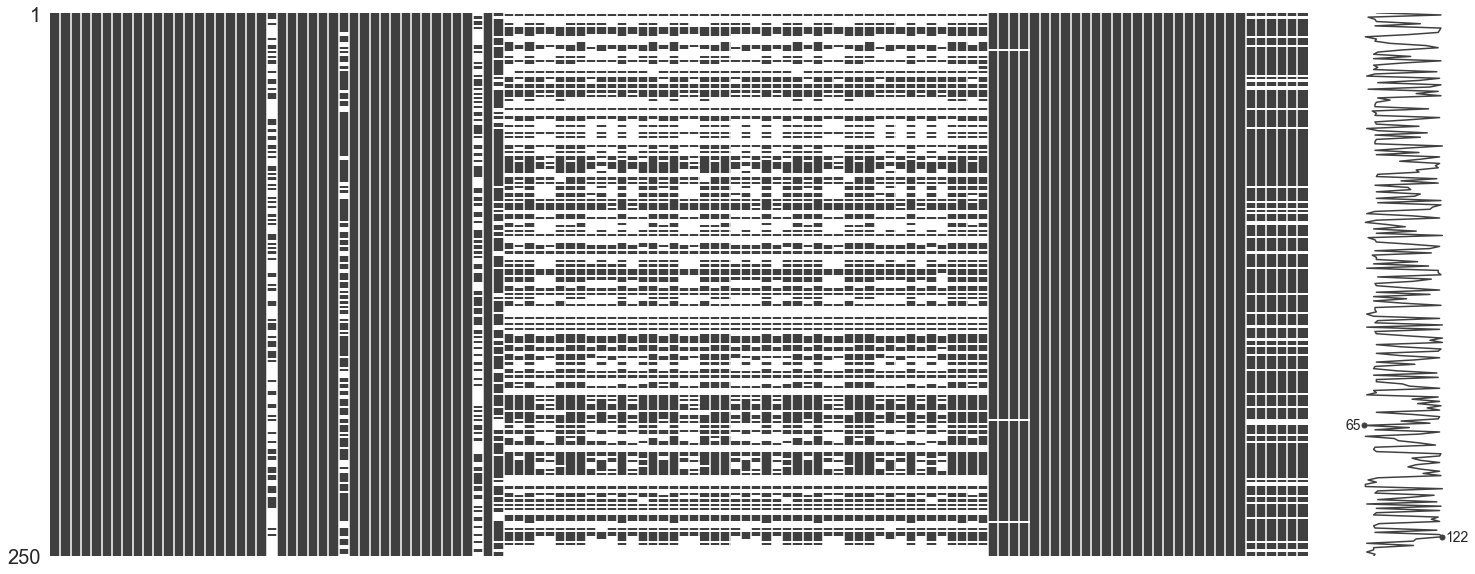

In [7]:
msno.matrix(data_train.sample(250))

# 2. Analyse exploratoire et traitement des données

## a) Analyse des variables catégorielles

> On affiche les pourcentages de cellules vides pour les colonnes de notre dataframe :

In [8]:
def col_val_manquantes(df):

    val_manquantes = df.isnull().sum()

    val_manquantes_pourc = 100 * df.isnull().sum() / len(df)

    table_val_manq = pd.concat([val_manquantes,
                                val_manquantes_pourc],
                               axis=1)

    col = {0:'Valeurs manquantes', 1:'% du Total'}
    table_val_manq_new = table_val_manq.rename(columns=col)

    table_val_manq_new = table_val_manq_new[
        table_val_manq_new.iloc[:,1] != 0].sort_values(
        '% du Total', ascending=False).round(1)

    print ("Le dataframe a " + str(df.shape[1]) + " columns.\n"  
           "Il y a " + str(table_val_manq_new.shape[0]) +
           " colonnes qui ont des valeurs manquantes.")

    return table_val_manq_new


valeurs_manq = col_val_manquantes(data_train)
valeurs_manq.head(30)

Le dataframe a 122 columns.
Il y a 67 colonnes qui ont des valeurs manquantes.


,Valeurs manquantes,% du Total
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## b) Analyse des variables quantitatives

* La colonne **DAYS_BIRTH** contient des valeurs négatives correspondants au nombre de jours précédents la souscription du prêt :

In [9]:
(data_train["DAYS_BIRTH"] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

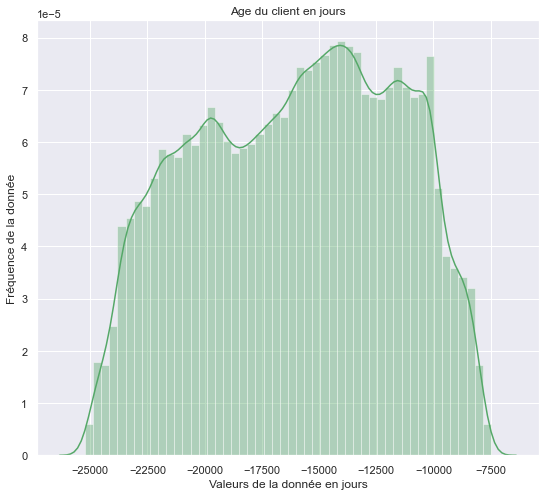

Indicateurs statistiques :

Moyenne:
 -16036.995066843137
Médiane:
 -15750.0
Mode:
 0   -13749
dtype: int64
Variance:
 19044334.847571064
Ecart type:
 4363.981536117111
Skewness:
 -0.11567331170166129
Kurtosis:
 -1.049125769946035
Maximum:
 -7489
Minimum:
 -25229


In [10]:
plt.figure(figsize=(9, 8))
sns.distplot(data_train['DAYS_BIRTH'], color='g', kde=True)
plt.title("Age du client en jours")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée en jours")
plt.show()

subset = data_train['DAYS_BIRTH']
print("Indicateurs statistiques :\n")
print("Moyenne:\n", subset.mean())
print("Médiane:\n", subset.median())
print("Mode:\n", subset.mode())
print("Variance:\n", subset.var(ddof=0))
print("Ecart type:\n", subset.std(ddof=0))
print("Skewness:\n", subset.skew())
print("Kurtosis:\n", subset.kurt())
print("Maximum:\n", subset.max())
print("Minimum:\n", subset.min())

> <font color='red'>ANALYSE</font>

>   <font color='red'> On ne constate pas de valeurs aberrantes de l'âge. </font>

* Colonne **DAYS_EMPLOYED** qui est la date d'embauche relatif à la soucription du prêt donc devrait contenir des valeurs négatives

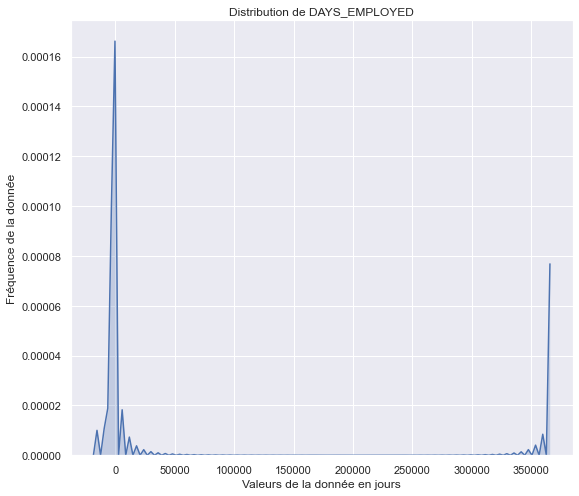

Indicateurs statistiques :

Moyenne:
 63815.04590404896
Médiane:
 -1213.0
Mode:
 0    365243
dtype: int64
Variance:
 19958777300.953392
Ecart type:
 141275.53680999903
Skewness:
 1.6643461980685423
Kurtosis:
 0.7716123806586115
Maximum:
 365243
Minimum:
 -17912


In [11]:
plt.figure(figsize=(9, 8))

sns.kdeplot(data_train["DAYS_EMPLOYED"].values, color='b', shade=True)
plt.title("Distribution de DAYS_EMPLOYED")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée en jours")
plt.show()

subset = data_train["DAYS_EMPLOYED"]
print("Indicateurs statistiques :\n")
print("Moyenne:\n", subset.mean())
print("Médiane:\n", subset.median())
print("Mode:\n", subset.mode())
print("Variance:\n", subset.var(ddof=0))
print("Ecart type:\n", subset.std(ddof=0))
print("Skewness:\n", subset.skew())
print("Kurtosis:\n", subset.kurt())
print("Maximum:\n", subset.max())
print("Minimum:\n", subset.min())

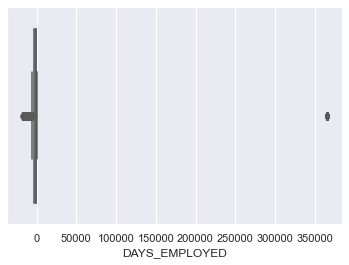

In [12]:
ax = sns.boxplot(x=data_train["DAYS_EMPLOYED"],
                 orient="h", palette="Set2")

> <font color='red'>ANALYSE</font>

>   <font color='red'> On constate des valeurs aberrantes telles que le maximum qui correspond à 1000 ans. </font>

* Les données **DAYS_REGISTRATION et DAYS_ID_PUBLISH** :

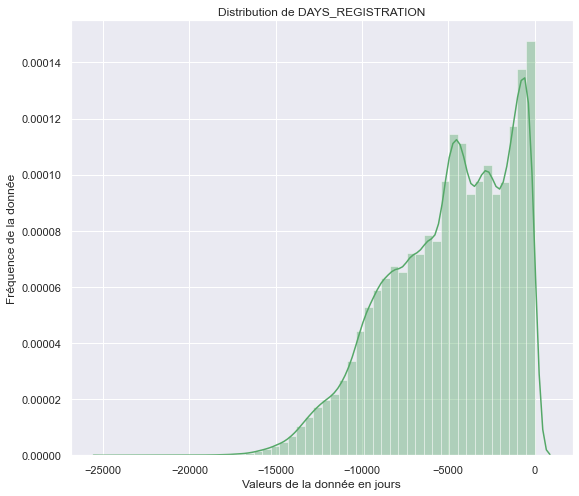

Indicateurs statistiques :

Moyenne:
 -4986.120327538419
Médiane:
 -4504.0
Mode:
 0   -1.0
dtype: float64
Variance:
 12410687.67178114
Ecart type:
 3522.8805928928587
Skewness:
 -0.590871615735003
Kurtosis:
 -0.3213466019399345
Maximum:
 0.0
Minimum:
 -24672.0


In [13]:
plt.figure(figsize=(9, 8))
sns.distplot(data_train['DAYS_REGISTRATION'], color='g', kde=True)
plt.title("Distribution de DAYS_REGISTRATION")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée en jours")
plt.show()

subset = data_train['DAYS_REGISTRATION']
print("Indicateurs statistiques :\n")
print("Moyenne:\n", subset.mean())
print("Médiane:\n", subset.median())
print("Mode:\n", subset.mode())
print("Variance:\n", subset.var(ddof=0))
print("Ecart type:\n", subset.std(ddof=0))
print("Skewness:\n", subset.skew())
print("Kurtosis:\n", subset.kurt())
print("Maximum:\n", subset.max())
print("Minimum:\n", subset.min())

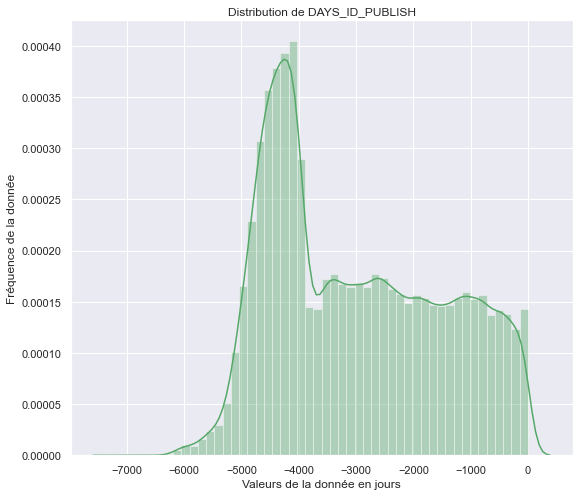

Indicateurs statistiques :

Moyenne:
 -2994.2023732484367
Médiane:
 -3254.0
Mode:
 0   -4053
dtype: int64
Variance:
 2278433.1581306527
Ecart type:
 1509.4479646979066
Skewness:
 0.3493274932029977
Kurtosis:
 -1.1068078939971002
Maximum:
 0
Minimum:
 -7197


In [14]:
plt.figure(figsize=(9, 8))
sns.distplot(data_train['DAYS_ID_PUBLISH'], color='g', kde=True)
plt.title("Distribution de DAYS_ID_PUBLISH")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée en jours")
plt.show()

subset = data_train['DAYS_ID_PUBLISH']
print("Indicateurs statistiques :\n")
print("Moyenne:\n", subset.mean())
print("Médiane:\n", subset.median())
print("Mode:\n", subset.mode())
print("Variance:\n", subset.var(ddof=0))
print("Ecart type:\n", subset.std(ddof=0))
print("Skewness:\n", subset.skew())
print("Kurtosis:\n", subset.kurt())
print("Maximum:\n", subset.max())
print("Minimum:\n", subset.min())

> <font color='red'>ANALYSE</font>

>   <font color='red'> Les distributions de ces 2 colonnes semblent correctes avec des valeurs négatives.</font>

## c) Représentation et analyse univariée des données pertinentes 

* Affichage d'indicateurs statistiques : 

In [15]:
data_train.describe(include="all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


### Affichage des distributions

* Distribution de la donnée **TARGET** :

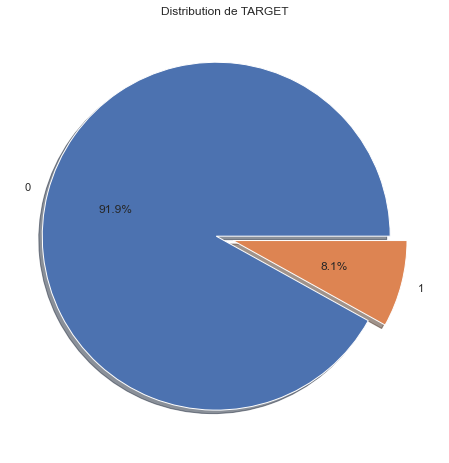

In [16]:
plt.figure(figsize=(9, 8))
explode = (0, 0.5)
labels = data_train["TARGET"].value_counts().index
plt.pie(x=data_train["TARGET"].value_counts().values, explode=[0.05]*2,
        labels=labels,
        shadow=True,
        autopct="%.1f%%")


plt.title("Distribution de TARGET")
plt.show()

* Distribution de la donnée **CODE_GENDER** :

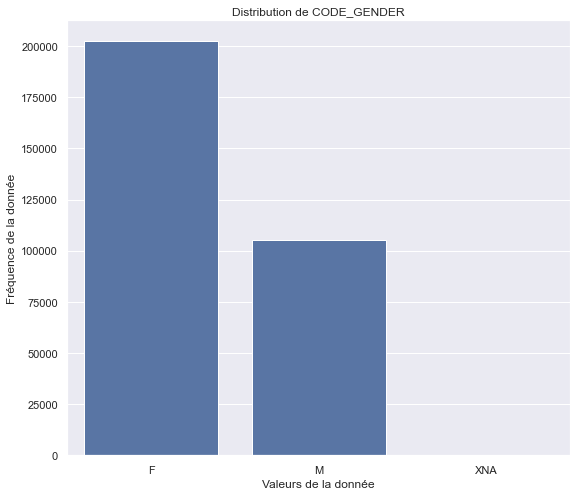

In [17]:
plt.figure(figsize=(9, 8))
sns.countplot(x='CODE_GENDER', data=data_train, color='b',
              order=data_train['CODE_GENDER'].value_counts().index)
plt.title("Distribution de CODE_GENDER")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée")
plt.show()

* Distribution de la donnée **NAME_CONTRACT_TYPE** :

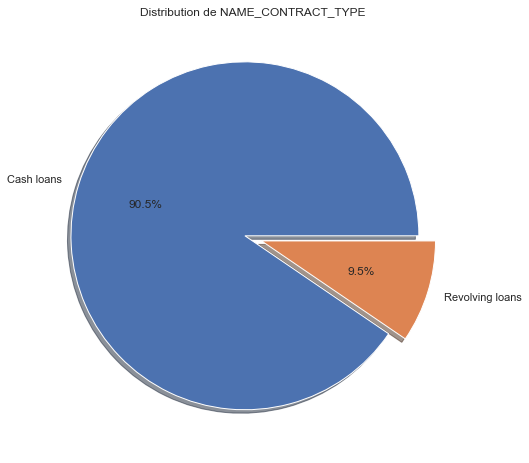

In [18]:
plt.figure(figsize=(9, 8))
explode = (0, 0.5)
labels = data_train["NAME_CONTRACT_TYPE"].value_counts().index
plt.pie(x=data_train["NAME_CONTRACT_TYPE"].value_counts().values,
        explode=[0.05]*2,
        labels=labels,
        shadow=True,
        autopct="%.1f%%")


plt.title("Distribution de NAME_CONTRACT_TYPE")
plt.show()

* Distribution de la donnée nutritionnelles **FLAG_OWN_CAR** :

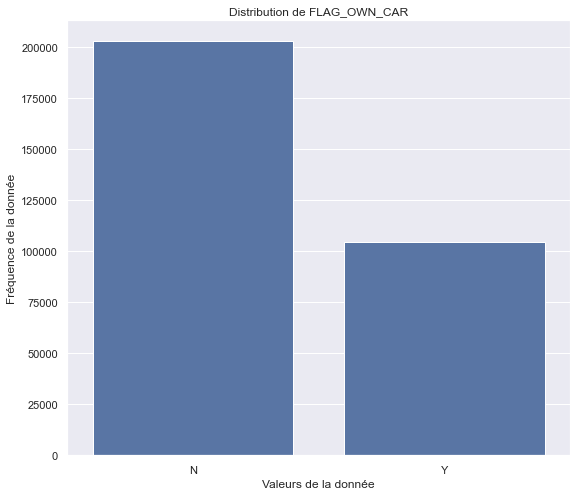

In [19]:
plt.figure(figsize=(9, 8))
sns.countplot(x='FLAG_OWN_CAR', data=data_train, color='b',
              order=data_train['FLAG_OWN_CAR'].value_counts().index)
plt.title("Distribution de FLAG_OWN_CAR")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée")
plt.show()

* Distribution de la donnée **FLAG_OWN_REALTY** :

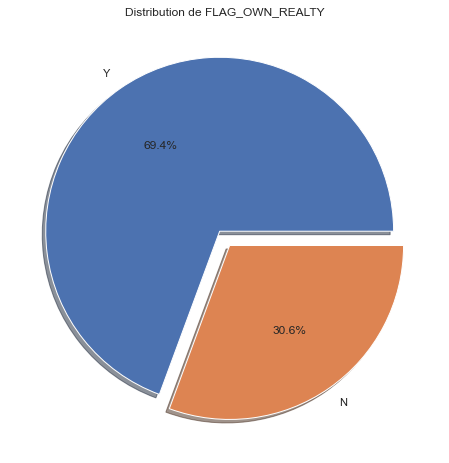

In [20]:
plt.figure(figsize=(9, 8))
explode = (0, 0.5)
labels = data_train["FLAG_OWN_REALTY"].value_counts().index
plt.pie(x=data_train["FLAG_OWN_REALTY"].value_counts().values,
        explode=[0.05]*2,
        labels=labels,
        shadow=True,
        autopct="%.1f%%")


plt.title("Distribution de FLAG_OWN_REALTY")
plt.show()

* Distribution de la donnée **CNT_CHILDREN** :

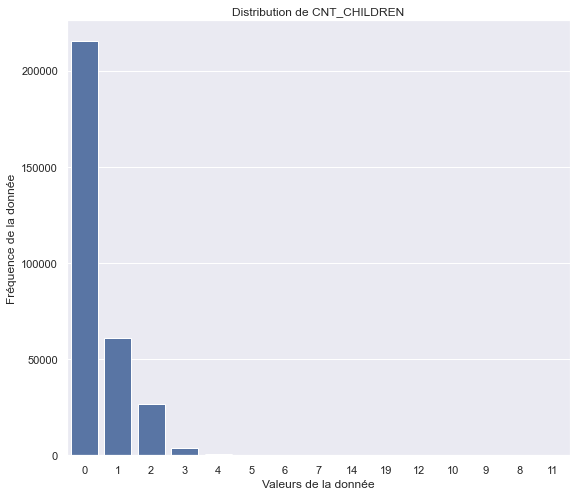

In [21]:
plt.figure(figsize=(9, 8))
sns.countplot(x='CNT_CHILDREN', data=data_train, color='b',
              order=data_train['CNT_CHILDREN'].value_counts().index)
plt.title("Distribution de CNT_CHILDREN")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée")
plt.show()

* Distribution de la donnée **AMT_INCOME_TOTAL** :

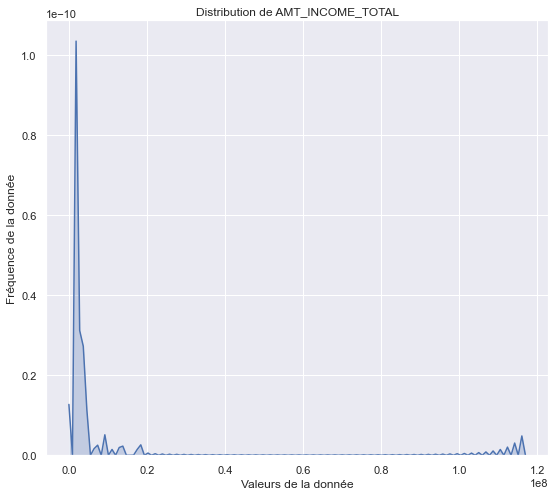

Indicateurs statistiques :

Moyenne:
 168797.9192969845
Médiane:
 147150.0
Mode:
 0    135000.0
dtype: float64
Variance:
 56227203654.42591
Ecart type:
 237122.76072622364
Skewness:
 391.5596541041876
Kurtosis:
 191786.55438080415
Maximum:
 117000000.0
Minimum:
 25650.0


In [22]:
plt.figure(figsize=(9, 8))

sns.kdeplot(data_train["AMT_INCOME_TOTAL"].values, color='b',
            shade=True)
plt.title("Distribution de AMT_INCOME_TOTAL")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée")
plt.show()

subset = data_train["AMT_INCOME_TOTAL"]
print("Indicateurs statistiques :\n")
print("Moyenne:\n", subset.mean())
print("Médiane:\n", subset.median())
print("Mode:\n", subset.mode())
print("Variance:\n", subset.var(ddof=0))
print("Ecart type:\n", subset.std(ddof=0))
print("Skewness:\n", subset.skew())
print("Kurtosis:\n", subset.kurt())
print("Maximum:\n", subset.max())
print("Minimum:\n", subset.min())

* Distribution de la donnée **AMT_CREDIT** :

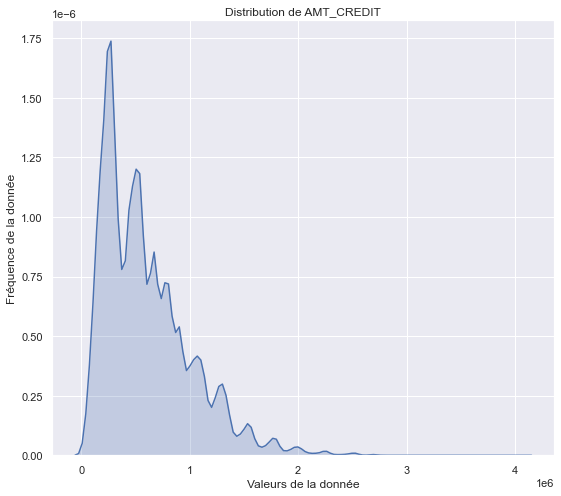

Indicateurs statistiques :

Moyenne:
 599025.9997057016
Médiane:
 513531.0
Mode:
 0    450000.0
dtype: float64
Variance:
 161998298760.19644
Ecart type:
 402490.1225622766
Skewness:
 1.2347784971349398
Kurtosis:
 1.9340413008324937
Maximum:
 4050000.0
Minimum:
 45000.0


In [23]:
plt.figure(figsize=(9, 8))

sns.kdeplot(data_train["AMT_CREDIT"].values, color='b',
            shade=True)
plt.title("Distribution de AMT_CREDIT")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée")
plt.show()

subset = data_train["AMT_CREDIT"]
print("Indicateurs statistiques :\n")
print("Moyenne:\n", subset.mean())
print("Médiane:\n", subset.median())
print("Mode:\n", subset.mode())
print("Variance:\n", subset.var(ddof=0))
print("Ecart type:\n", subset.std(ddof=0))
print("Skewness:\n", subset.skew())
print("Kurtosis:\n", subset.kurt())
print("Maximum:\n", subset.max())
print("Minimum:\n", subset.min())

* Distribution de la donnée **AMT_ANNUITY** :

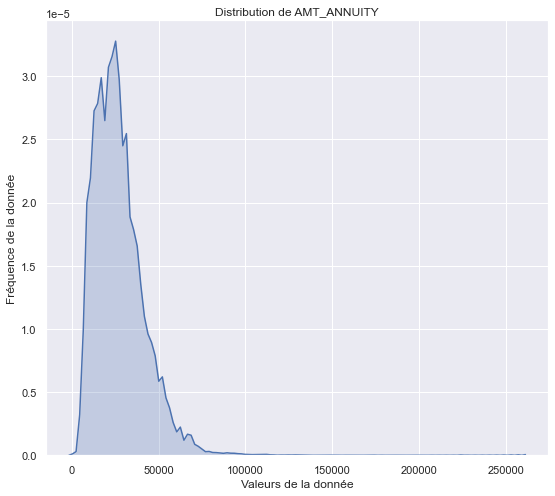

Indicateurs statistiques :

Moyenne:
 27108.573909183444
Médiane:
 24903.0
Mode:
 0    9000.0
dtype: float64
Variance:
 210067738.20806694
Ecart type:
 14493.713747969046
Skewness:
 1.5797773638612507
Kurtosis:
 7.707319914804311
Maximum:
 258025.5
Minimum:
 1615.5


In [24]:
plt.figure(figsize=(9, 8))

sns.kdeplot(data_train["AMT_ANNUITY"].values, color='b',
            shade=True)
plt.title("Distribution de AMT_ANNUITY")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée")
plt.show()

subset = data_train["AMT_ANNUITY"]
print("Indicateurs statistiques :\n")
print("Moyenne:\n", subset.mean())
print("Médiane:\n", subset.median())
print("Mode:\n", subset.mode())
print("Variance:\n", subset.var(ddof=0))
print("Ecart type:\n", subset.std(ddof=0))
print("Skewness:\n", subset.skew())
print("Kurtosis:\n", subset.kurt())
print("Maximum:\n", subset.max())
print("Minimum:\n", subset.min())

* Distribution de la donnée **AMT_GOODS_PRICE** :

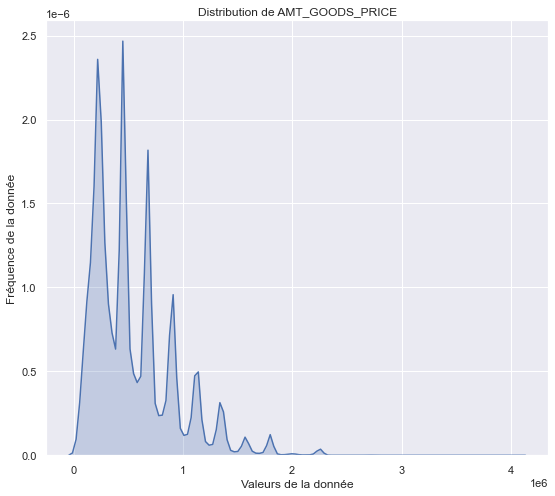

Indicateurs statistiques :

Moyenne:
 538396.2074288895
Médiane:
 450000.0
Mode:
 0    450000.0
dtype: float64
Variance:
 136490242947.6439
Ecart type:
 369445.8592915123
Skewness:
 1.3490003414747445
Kurtosis:
 2.4319164792166954
Maximum:
 4050000.0
Minimum:
 40500.0


In [25]:
plt.figure(figsize=(9, 8))

sns.kdeplot(data_train["AMT_GOODS_PRICE"].values, color='b',
            shade=True)
plt.title("Distribution de AMT_GOODS_PRICE")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée")
plt.show()

subset = data_train["AMT_GOODS_PRICE"]
print("Indicateurs statistiques :\n")
print("Moyenne:\n", subset.mean())
print("Médiane:\n", subset.median())
print("Mode:\n", subset.mode())
print("Variance:\n", subset.var(ddof=0))
print("Ecart type:\n", subset.std(ddof=0))
print("Skewness:\n", subset.skew())
print("Kurtosis:\n", subset.kurt())
print("Maximum:\n", subset.max())
print("Minimum:\n", subset.min())

* Distribution de la donnée **OWN_CAR_AGE** :

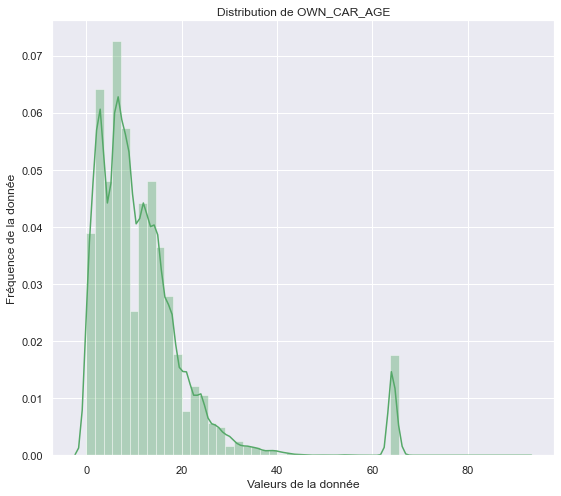

Indicateurs statistiques :

Moyenne:
 12.061090818687727
Médiane:
 9.0
Mode:
 0    7.0
dtype: float64
Variance:
 142.67715946107708
Ecart type:
 11.94475447470885
Skewness:
 2.745422130868455
Kurtosis:
 9.214945323055359
Maximum:
 91.0
Minimum:
 0.0


In [26]:
plt.figure(figsize=(9, 8))
sns.distplot(data_train['OWN_CAR_AGE'], color='g', kde=True)
plt.title("Distribution de OWN_CAR_AGE")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée")
plt.show()

subset = data_train['OWN_CAR_AGE']
print("Indicateurs statistiques :\n")
print("Moyenne:\n", subset.mean())
print("Médiane:\n", subset.median())
print("Mode:\n", subset.mode())
print("Variance:\n", subset.var(ddof=0))
print("Ecart type:\n", subset.std(ddof=0))
print("Skewness:\n", subset.skew())
print("Kurtosis:\n", subset.kurt())
print("Maximum:\n", subset.max())
print("Minimum:\n", subset.min())

* Distribution de la donnée **EXT_SOURCE_1** :

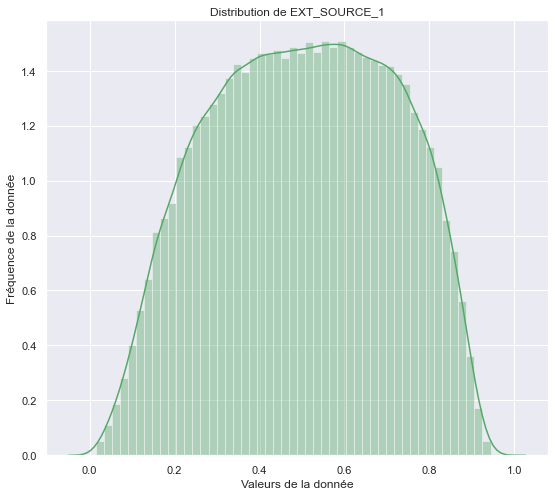

Indicateurs statistiques :

Moyenne:
 0.5021298056566621
Médiane:
 0.5059979305057544
Mode:
 0     0.356323
1     0.443982
2     0.499002
3     0.528197
4     0.546426
5     0.581015
6     0.598469
7     0.605152
8     0.622707
9     0.667740
10    0.765724
dtype: float64
Variance:
 0.044546940955866594
Ecart type:
 0.21106146250764632
Skewness:
 -0.06875505870176395
Kurtosis:
 -0.9651552847611118
Maximum:
 0.962692770561306
Minimum:
 0.014568132412445587


In [27]:
plt.figure(figsize=(9, 8))
sns.distplot(data_train['EXT_SOURCE_1'], color='g', kde=True)
plt.title("Distribution de EXT_SOURCE_1")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée")
plt.show()

subset = data_train['EXT_SOURCE_1']
print("Indicateurs statistiques :\n")
print("Moyenne:\n", subset.mean())
print("Médiane:\n", subset.median())
print("Mode:\n", subset.mode())
print("Variance:\n", subset.var(ddof=0))
print("Ecart type:\n", subset.std(ddof=0))
print("Skewness:\n", subset.skew())
print("Kurtosis:\n", subset.kurt())
print("Maximum:\n", subset.max())
print("Minimum:\n", subset.min())

* Distribution de la donnée **EXT_SOURCE_2** :

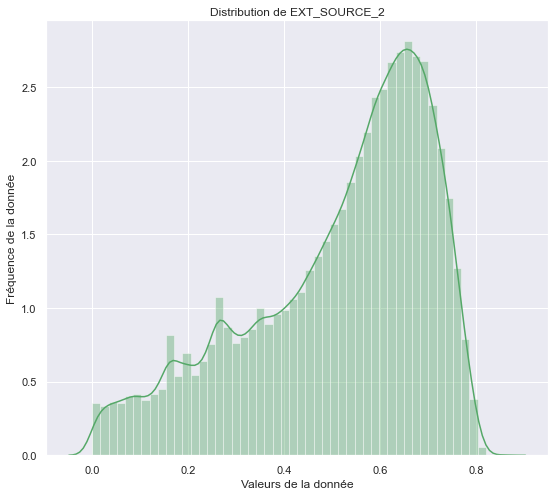

Indicateurs statistiques :

Moyenne:
 0.5143926741308463
Médiane:
 0.5659614260608526
Mode:
 0    0.285898
dtype: float64
Variance:
 0.03650386385964944
Ecart type:
 0.1910598436606956
Skewness:
 -0.7935760449636996
Kurtosis:
 -0.2691308299026076
Maximum:
 0.8549996664047012
Minimum:
 8.173616518884397e-08


In [28]:
plt.figure(figsize=(9, 8))
sns.distplot(data_train['EXT_SOURCE_2'], color='g', kde=True)
plt.title("Distribution de EXT_SOURCE_2")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée")
plt.show()

subset = data_train['EXT_SOURCE_2']
print("Indicateurs statistiques :\n")
print("Moyenne:\n", subset.mean())
print("Médiane:\n", subset.median())
print("Mode:\n", subset.mode())
print("Variance:\n", subset.var(ddof=0))
print("Ecart type:\n", subset.std(ddof=0))
print("Skewness:\n", subset.skew())
print("Kurtosis:\n", subset.kurt())
print("Maximum:\n", subset.max())
print("Minimum:\n", subset.min())

* Distribution de la donnée **EXT_SOURCE_3** :

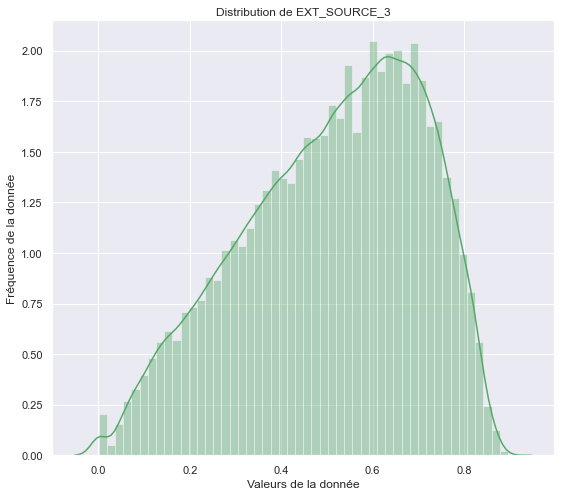

Indicateurs statistiques :

Moyenne:
 0.5108529061800121
Médiane:
 0.5352762504724826
Mode:
 0    0.7463
dtype: float64
Variance:
 0.037964172378527936
Ecart type:
 0.19484396931526501
Skewness:
 -0.4093904596160265
Kurtosis:
 -0.6634630539622153
Maximum:
 0.8960095494948396
Minimum:
 0.0005272652387098817


In [29]:
plt.figure(figsize=(9, 8))
sns.distplot(data_train['EXT_SOURCE_3'], color='g', kde=True)
plt.title("Distribution de EXT_SOURCE_3")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée")
plt.show()

subset = data_train['EXT_SOURCE_3']
print("Indicateurs statistiques :\n")
print("Moyenne:\n", subset.mean())
print("Médiane:\n", subset.median())
print("Mode:\n", subset.mode())
print("Variance:\n", subset.var(ddof=0))
print("Ecart type:\n", subset.std(ddof=0))
print("Skewness:\n", subset.skew())
print("Kurtosis:\n", subset.kurt())
print("Maximum:\n", subset.max())
print("Minimum:\n", subset.min())

### Traitement des variables catégorielles

> On peut afficher les types de variables et leur nombre par type :

In [30]:
data_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

> Il y a 16 colonnes de type String donc des chaines de caractères. On peut chercher le nombre de valeurs distinctes pour chacune de ces variables catégorielles.

In [31]:
data_train.select_dtypes('object').apply(pd.Series.nunique,
                                         axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

> Il est important de convertir les données des colonnes catégorielles en données numériques afin
d'être exploitable par le modèle de machine learning. Les techniques utilisées sont le <font color='red'>**label encoding**</font> pour les variables avec moins de 2 catégories et le <font color='red'>**one-hot encoding**</font> pour les variables avec plus de 2 catégories.

* Label encoding :

In [32]:
le = LabelEncoder()
le_count = 0

for col in data_train:
    if data_train[col].dtype == 'object':
        if len(list(data_train[col].unique())) <= 2:
            le.fit(data_train[col])
            data_train[col] = le.transform(data_train[col])
            le_count += 1

print('%d colonnes avec la méthode label encoded.' % le_count)

3 colonnes avec la méthode label encoded.


* One-hot encoding pour les variables qualitatives avec plus de 2 catégories :

In [33]:
data_train = pd.get_dummies(data_train)

print('Dimension du fichier train : ', data_train.shape)

Dimension du fichier train :  (307511, 243)


### Traitement des variables quantitatives

In [34]:
anom_train = data_train[data_train["DAYS_EMPLOYED"] == 365243]

print('Il y a %d lignes dans le fichier train dont\
 le nombre de jours depuis l embauche est anormale' % len(anom_train))

Il y a 55374 lignes dans le fichier train dont le nombre de jours depuis l embauche est anormale


> On remplace les valeurs aberrantes de la colonne par NaN dans les fichiers train et test: 

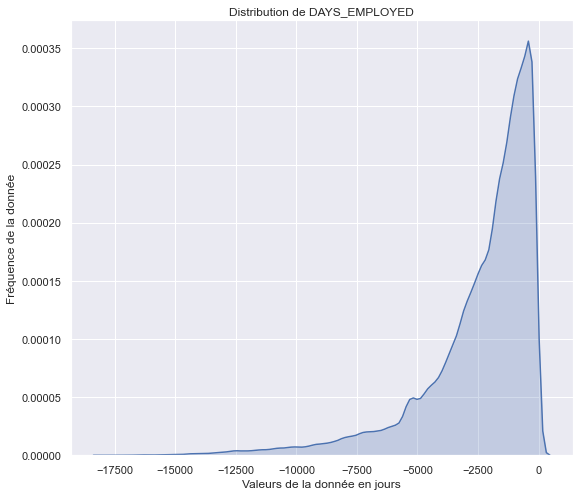

Indicateurs statistiques :

Moyenne:
 -2384.1693246132063
Médiane:
 -1648.0
Mode:
 0   -200.0
dtype: float64
Variance:
 5467906.5610760115
Ecart type:
 2338.3555249525275
Skewness:
 -1.968315531070478
Kurtosis:
 4.752651548074546
Maximum:
 0.0
Minimum:
 -17912.0


In [35]:
data_train['DAYS_EMPLOYED_ANOM'] = data_train["DAYS_EMPLOYED"] == 365243
data_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

plt.figure(figsize=(9, 8))

sns.kdeplot(data_train["DAYS_EMPLOYED"].values, color='b', shade=True)
plt.title("Distribution de DAYS_EMPLOYED")
plt.ylabel("Fréquence de la donnée")
plt.xlabel("Valeurs de la donnée en jours")
plt.show()

subset = data_train["DAYS_EMPLOYED"]
print("Indicateurs statistiques :\n")
print("Moyenne:\n", subset.mean())
print("Médiane:\n", subset.median())
print("Mode:\n", subset.mode())
print("Variance:\n", subset.var(ddof=0))
print("Ecart type:\n", subset.std(ddof=0))
print("Skewness:\n", subset.skew())
print("Kurtosis:\n", subset.kurt())
print("Maximum:\n", subset.max())
print("Minimum:\n", subset.min())

> <font color='red'>ANALYSE</font>

>   <font color='red'> La distribution semble correcte après le traitement de la valeur aberrante 365243.</font>

## d) Corrélations éventuelles entre les variables

* Corrélation entre variables quantitatives

> Dans un premier temps, examinons la correlation entre les variables numériques
  en déterminant le coefficient de corrélation de Pearson :

In [36]:
data_train_num = data_train.select_dtypes(include=['float64',
                                                   'int64'])
data_train_num.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,0.001654,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,-0.030896,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241544,-0.185850,...,-0.007530,-0.005190,-0.007308,0.055821,0.000453,-0.005118,-0.015296,-0.014369,-0.021962,-0.052494
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141588,0.120310,...,-0.000097,0.002184,0.007299,0.006741,0.002669,0.000572,0.000242,0.020477,-0.009936,-0.036345
FLAG_OWN_REALTY,0.000703,-0.006148,0.067177,-0.002817,1.000000,-0.002366,0.002934,-0.039270,-0.005225,-0.045537,...,-0.087687,-0.019364,-0.025130,-0.000173,-0.004120,-0.009267,0.007474,-0.004480,0.015451,0.067451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.005118,0.000572,-0.009267,-0.000366,0.002944,0.004238,0.002185,0.004677,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.015296,0.000242,0.007474,-0.002436,0.002387,-0.001275,0.013881,-0.001007,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.014369,0.020477,-0.004480,-0.010808,0.024700,0.054451,0.039148,0.056422,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.021962,-0.009936,0.015451,-0.007836,0.004859,0.015925,0.010124,0.016432,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


> Observons plus particulièrement les corrélations entre la colonne **TARGET** et les autres colonnes sachnat qu'on définit le degré de corrélation suivant l'échelle ci-dessous :

  * 0.00-0.19 “très faible”
  *  0.20-0.39 “faible”
  * 0.40-0.59 “modéré”
  * 0.60-0.79 “fort”
  * 0.80-1.00 “ très fort”

In [37]:
correlations = data_train.corr()['TARGET'].sort_values()

print('Fortes corrélations positives:\n', correlations.tail(15))
print('\nFortes corrélations négatives:\n', correlations.head(15))

Fortes corrélations positives:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Fortes c

> <font color='red'> Il y a de très faibles corrélations cependant les variables **DAYS_BIRTH et DAYS_EMPLOYED** sont les plus correlées positivement à **TARGET** mais négativement si on prend leurs valeurs absolues.
 De plus, **EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3** sont les plus correlés négativement à **TARGET.**</font>

In [38]:
print('Corrélation de DAYS_BIRTH en valeur absolu avec TARGET:\n',
      abs(data_train['DAYS_BIRTH']).corr(data_train['TARGET']))
print('Corrélation de DAYS_EMPLOYED en valeur absolu avec TARGET:\n',
      abs(data_train['DAYS_EMPLOYED']).corr(data_train['TARGET']))

Corrélation de DAYS_BIRTH en valeur absolu avec TARGET:
 -0.07823930830982745
Corrélation de DAYS_EMPLOYED en valeur absolu avec TARGET:
 -0.07495845742543962


> <font color='green'> Un client plus âgé ou travaillant depui longtemps aura tendance à rembourser plus facilement son crédit (TARGET à 0).</font>

> <font color='green'> De plus, les scores de source externe (compris entre 0 et 1) semblent anticorrelés à TARGET car plus ils tendent vers 1, plus le client aura tendance à rembourser le crédit.</font>

* Affichage d'un heatmap pour la visualisation des corrélations avec TARGET 

In [39]:
ext_data = data_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
                       'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239,0.074958
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610,-0.252712
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996,-0.093444
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478,-0.129722
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000,0.352321
DAYS_EMPLOYED,0.074958,-0.252712,-0.093444,-0.129722,0.352321,1.000000


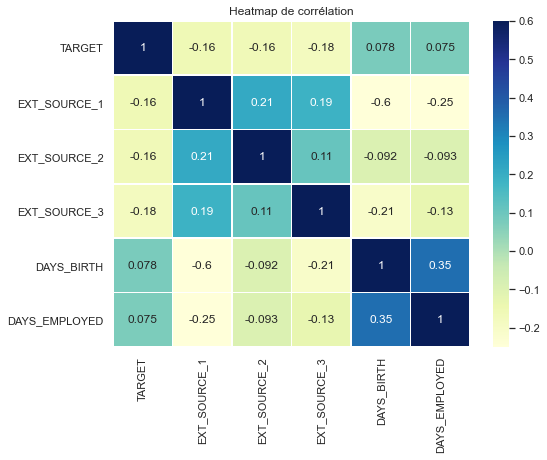

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(ext_data_corrs, cmap="YlGnBu",
            vmin=-0.25, annot=True, vmax=0.6, linewidths=.5)
plt.title('Heatmap de corrélation')
plt.show()

* Affichage de l'influence de l'âge sur le TARGET

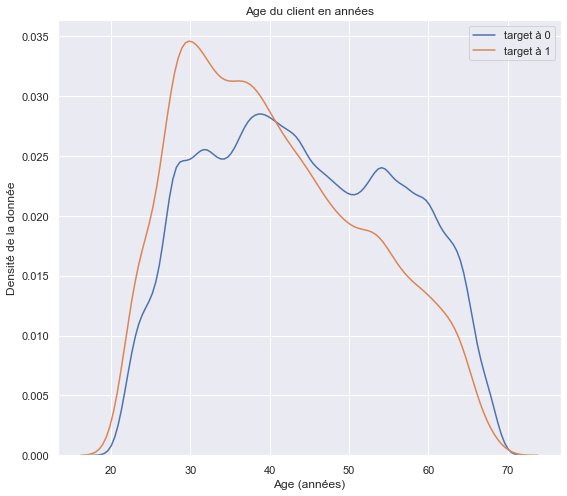

In [41]:
age_data = data_train[['TARGET', 'DAYS_BIRTH']]
age_data = age_data.assign(YEARS_BIRTH=data_train['DAYS_BIRTH']/-365)

plt.figure(figsize=(9, 8))
sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, 'DAYS_BIRTH']/-365,
            label='target à 0')
sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, 'DAYS_BIRTH']/-365,
            label='target à 1')
plt.title("Age du client en années")
plt.ylabel("Densité de la donnée")
plt.xlabel("Age (années)")
plt.show()

* Affichage de l'influence de la date d'embauche sur le TARGET

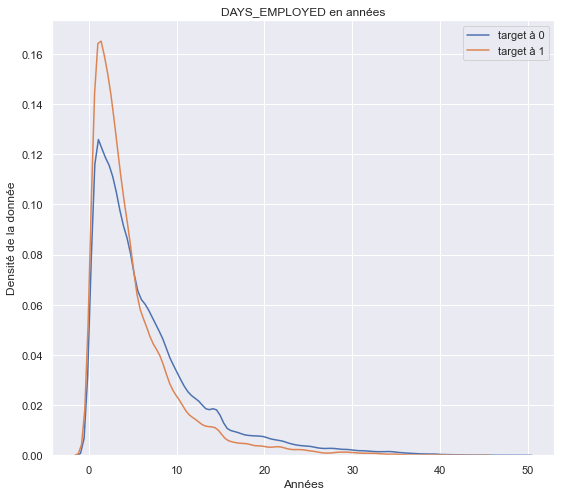

In [42]:
plt.figure(figsize=(9, 8))
sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, 'DAYS_EMPLOYED']/-365,
            label='target à 0')
sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, 'DAYS_EMPLOYED']/-365,
            label='target à 1')
plt.title("DAYS_EMPLOYED en années")
plt.ylabel("Densité de la donnée")
plt.xlabel("Années")
plt.show()

* Affichage de l'influence des scores externes sur le TARGET

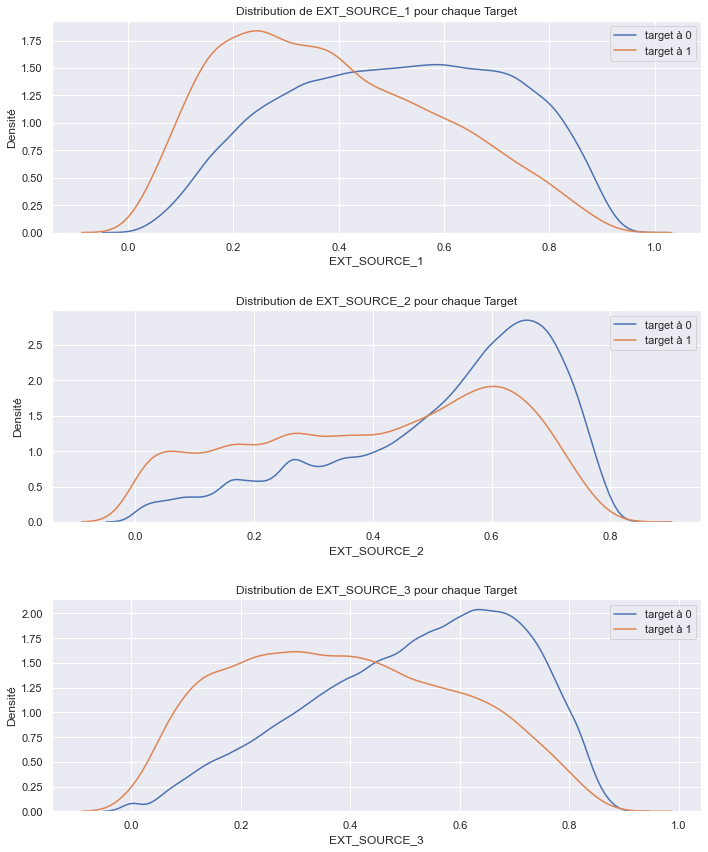

In [43]:
plt.figure(figsize=(10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    plt.subplot(3, 1, i + 1)
    sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, source],
                label='target à 0')
    sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, source],
                label='target à 1')
    plt.title('Distribution de %s pour chaque Target' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Densité')

plt.tight_layout(h_pad=2.5)

<font color='red'> EXT_SOURCE_3 montre la plus grande influence du score externe sur les valeurs de target et donc cette variable a une influence sur la capacité d'un client à rembourser un crédit. Cette corrélation reste cependant très faible mais on va retenir cette variable pour le modèle de machine learning.</font>

Text(0.5, 1.05, 'Ext Source and Age Features Pairs Plot')

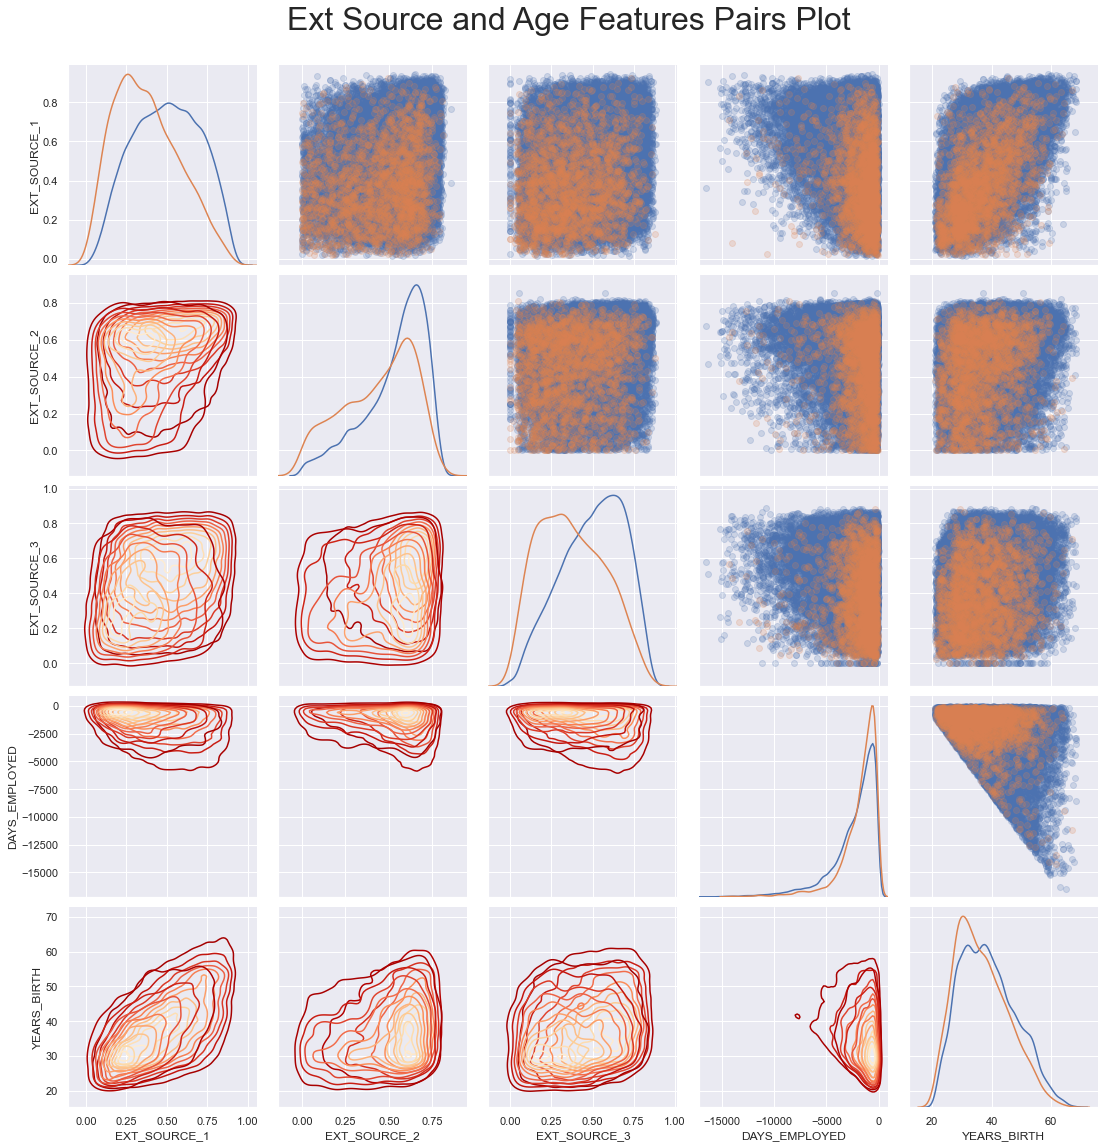

In [44]:
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()


plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']


plot_data = plot_data.dropna().loc[:100000, :]


def corr_func(x, y, **kwargs):


    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size=20)


col = list(plot_data.columns)
grid = sns.PairGrid(data=plot_data, size=3, diag_sharey=False,
                    hue='TARGET',
                    vars=[x for x in col if x != 'TARGET'])


grid.map_upper(plt.scatter, alpha=0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r)
plt.suptitle('Ext Source and Age Features Pairs Plot', size=32, y=1.05)

> <font color='red'>Il apparait un légère relation linéaire entre **EXT_SOURCE_1 et DAYS_BIRTH** (ou **YEARS_BIRTH**).</font>

# 3. Feature engineering

> On transforme les données brutes en la forme la plus appropriée pour un algorithme de machine learning spécifique

## a) Variables polynômiales¶

> Pour augmenter l'influence et la corrélation des variables **EXT_SOURCE et DAYS_BIRTH** avec **TARGET**,
  on va former de nouvelles variables qui sont des polynômes des variables initiales. 
  Dans notre cas, on va utiliser le degré d=3 afin d'obtenir de nouvelles variables qui sont le produit de    l'interaction entre ces premières variables (**ex : EXT_SOURCE_1 x EXT_SOURCE_2^2**).
> La classe **PolynomialFeatures** de **sklearn** permet de générer de telles variables polynômiales.

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer


poly_features = data_train[['EXT_SOURCE_1', 'EXT_SOURCE_2',
                            'EXT_SOURCE_3',
                            'DAYS_BIRTH', 'TARGET']]

imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns=['TARGET'])

poly_features = imputer.fit_transform(poly_features)

poly_transformer = PolynomialFeatures(degree=3)
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
print('Forme des variables polynômiales du fichier train : ',
      poly_features.shape)

Forme des variables polynômiales du fichier train :  (307511, 35)


> <font color='green'> On est passé de 4 variables à 35 variables polynômiales de degré inférieures ou égales à 3.</font>

In [46]:
poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1',
                                                   'EXT_SOURCE_2',
                                                   'EXT_SOURCE_3',
                                                   'DAYS_BIRTH'])[:35]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

* Examinons désormais les corrélations entre ces nouvelles variables et **TARGET** :

In [47]:
column_1 = poly_transformer.get_feature_names(['EXT_SOURCE_1',
                                               'EXT_SOURCE_2',
                                               'EXT_SOURCE_3',
                                               'DAYS_BIRTH'])
poly_features = pd.DataFrame(poly_features,
                             columns=column_1)

poly_features['TARGET'] = poly_target

poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


> <font color='green'> Les coefficients de corrélation linéaire des variables polynômiales sont plus élevées que les variables originales.</font>

In [48]:
poly_features['SK_ID_CURR'] = data_train['SK_ID_CURR']
data_train_poly = data_train.merge(poly_features,
                                   on='SK_ID_CURR',
                                   how='left')

print('Forme du fichier train avec les var. polynômiales : ',
      data_train_poly.shape)

Forme du fichier train avec les var. polynômiales :  (307511, 280)


## b) Variables fonctionnelles

> On va définir des variables fonctionnelles que l'on considère avoir une incidence et une influence sur la capacité d'un client à rembourser son crédit :
<font color='red'>
* CREDIT_INCOME_PERCENT: le pourcentage du montant total du crédit sur les revenus du client
* ANNUITY_INCOME_PERCENT: le pourcentage des rentes annuelles du crédit sur les revenus du client
* CREDIT_TERM: durée des paiements en mois
* DAYS_EMPLOYED_PERCENT: proportion de la période d'activité professionnelle du client par rapport à son âge
</font>

In [49]:
data_fonc = data_train.copy()

data_fonc['CREDIT_INCOME_PERCENT'] = data_fonc['AMT_CREDIT']  \
                             / data_fonc['AMT_INCOME_TOTAL']
data_fonc['ANNUITY_INCOME_PERCENT'] = data_fonc['AMT_ANNUITY'] \
                             / data_fonc['AMT_INCOME_TOTAL']
data_fonc['CREDIT_TERM'] = data_fonc['AMT_ANNUITY'] \
                             / data_fonc['AMT_CREDIT']
data_fonc['DAYS_EMPLOYED_PERCENT'] = data_fonc['DAYS_EMPLOYED'] \
                             / data_fonc['DAYS_BIRTH']

* Affichage des distributions de ces variables fonctionnelles :

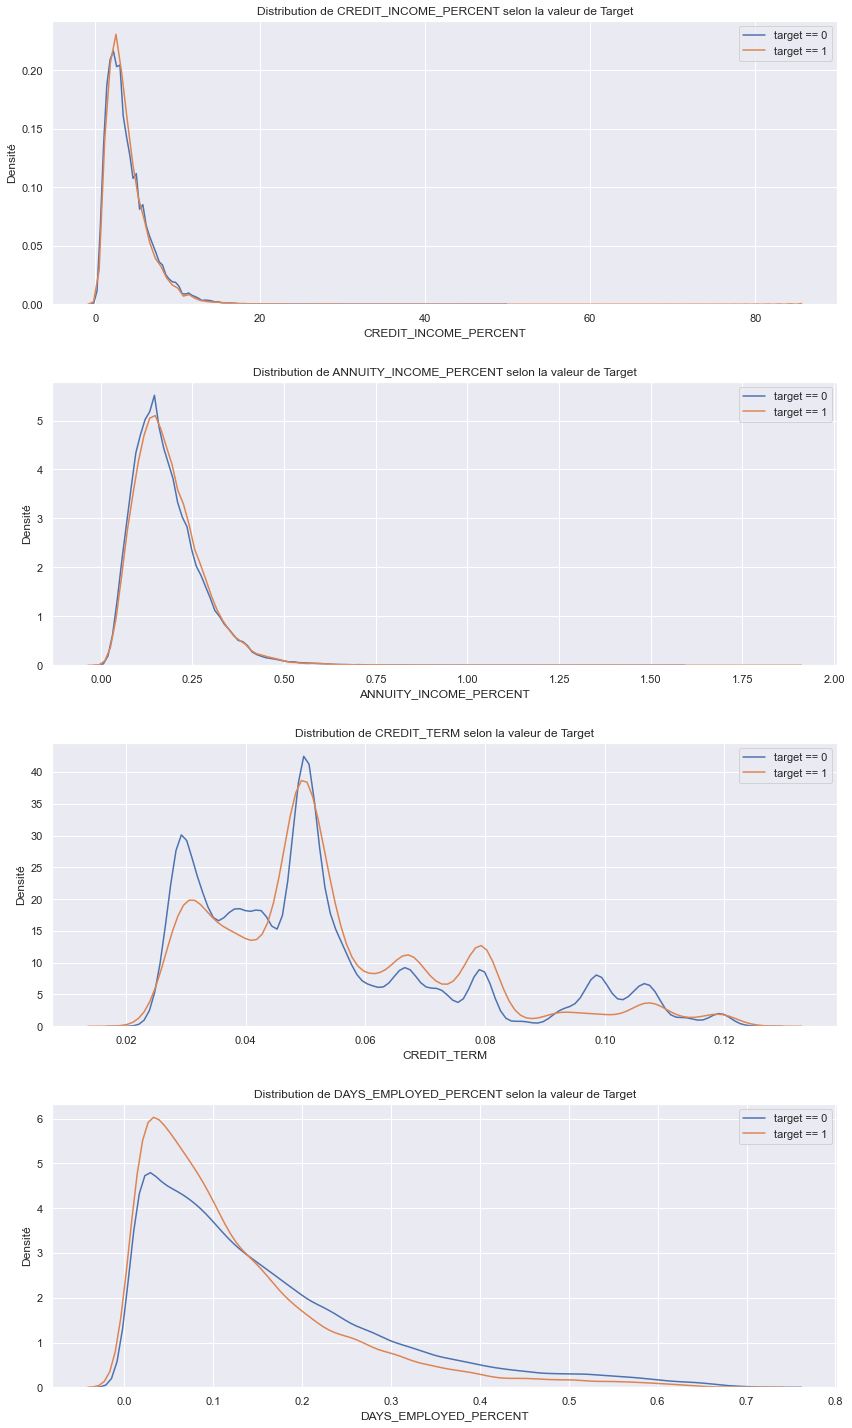

In [50]:
plt.figure(figsize=(12, 20))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT',
                             'ANNUITY_INCOME_PERCENT',
                             'CREDIT_TERM',
                             'DAYS_EMPLOYED_PERCENT']):

    plt.subplot(4, 1, i + 1)
    sns.kdeplot(data_fonc.loc[data_fonc['TARGET'] == 0,
                              feature],
                label='target == 0')
    sns.kdeplot(data_fonc.loc[data_fonc['TARGET'] == 1,
                              feature],
                label='target == 1')

    plt.title('Distribution de %s selon la valeur de Target' % feature)
    plt.xlabel('%s' % feature)
    plt.ylabel('Densité')

plt.tight_layout(h_pad=2.5)

# 4. Modèles de scoring des clients

> On va évaluer différents modèles de machine learning dans le cas de la classification binaire.


* Echantillonnage du jeu de données en sélectionnant le même nombre de lignes avec **TARGET 0** et **TARGET 1**

In [51]:
data_train[data_train["TARGET"] == 1].shape[0]

24825

In [52]:
data_train[data_train["TARGET"] == 0].shape[0]

282686

> Le nombre de lignes avec **TARGET à 0** est plus important, ce qui désequilibre notre jeu de données et peut induire un sur-apprentissage de notre modèle car la probabilité de prédire 0 sera importante. Il faut donc équilibrer le jeu de données afin d'avoir autant de lignes TARGET 0 et TARGET 1.

In [53]:
data_train_1 = data_train[data_train["TARGET"] == 1]
data_train_0 = data_train[data_train["TARGET"] == 0].sample(24825)
data_train = data_train_0.merge(data_train_1, how='outer')

In [54]:
print('Nombre de lignes du fichier train   : ', data_train[data_train["TARGET"] == 1].shape[0])
print('Nombre de colonnes du fichier train : ', data_train[data_train["TARGET"] == 0].shape[0])

Nombre de lignes du fichier train   :  24825
Nombre de colonnes du fichier train :  24825


## a) Baseline avec la régression logistique

* Imputation des valeurs manquantes par la médiane des différentes variables :

In [55]:
train_labels = data_train['TARGET']
if 'TARGET' in data_train:
    train = data_train.drop(columns=['TARGET'])
else:
    train = data_train.copy()

features = list(train.columns)

imputer = SimpleImputer(strategy='median')
imputer.fit(train)
train = imputer.transform(train)

* Elimination des variables avec une variance nulle. Cela permet de sélectionner uniquement les variables utiles afin d'améliorer l'efficacité de notre modèle:

In [56]:
from sklearn.feature_selection import VarianceThreshold
from collections import Counter

colonnes = []


def feature_selection(train_instances):


    print('Sélection des variables ...')
    selector = VarianceThreshold()
    selector.fit(train_instances)
    print('Nombre de variables utilisées ... ' +
          str(Counter(selector.get_support())[True]))
    var = list(selector.get_support())
    for count, e in enumerate(var):
        if e == True:
           colonnes.append(data_train.columns[count])

    print('Nombre de variables ignorées ... ' +
          str(Counter(selector.get_support())[False]))
    return selector

fs = feature_selection(train)
train = fs.transform(train)

data_train = pd.DataFrame(train, columns=colonnes)
data_train['TARGET'] = train_labels

Sélection des variables ...
Nombre de variables utilisées ... 238
Nombre de variables ignorées ... 5


* Normalisation des variables train pour améliorer les résultats du modèle  :

In [57]:
from sklearn.model_selection import train_test_split

# On récupère les features d'un côté...
X = data_train.iloc[:, 2:235]

# Les scores de l'autre
y = data_train.iloc[:, 1]
test_ids = data_train.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33)

scale = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

* Calcul de la probabillité que le client obtienne 1 avec la **Régression logistique** :

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

tab_f1    = []
tab_fbeta = []
tab_auroc = []

# Inverse du paramètre de régularisation -- > paramètre C
lr = LogisticRegression(max_iter=800)

lr.fit(X_train_scale, y_train)

y_prob_lr = lr.predict_proba(X_test_scale)[:, 1]
y_pred = lr.predict(X_test_scale)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)
f1 = f1_score(y_test, y_pred)
fbeta = fbeta_score(y_test, y_pred, beta=50)
tab_f1.append(f1)
tab_fbeta.append(fbeta)
tab_auroc.append(roc_auc)
print("F-mesure               : {:.4f}".format(f1))
print("F50-mesure             : {:.4f}".format(fbeta))
print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

F-mesure               : 0.6897
F50-mesure             : 0.6985
Aire sous la courbe ROC: 0.7536


* Affichage de la courbe ROC :

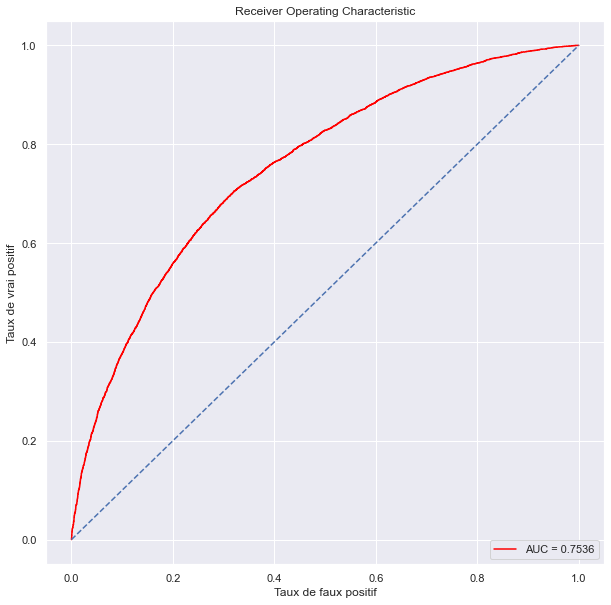

In [59]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

> <font color='red'> L'aire sous la courbe ROC est de **0.7536** ce qui est une bonne performance. On peut améliorer sa performance en recherchant les hyperparamètres optimales (coefficient de régularisation, validation croisée).</font>

* Classification report pour la régression logistique :

In [60]:
print("Logistic Regression Classifier report: \n\n",
      classification_report(y_test, y_pred))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.70      0.69      0.69      8352
           1       0.68      0.70      0.69      8033

    accuracy                           0.69     16385
   macro avg       0.69      0.69      0.69     16385
weighted avg       0.69      0.69      0.69     16385



* Matrice de confusion pour la régression logistique :

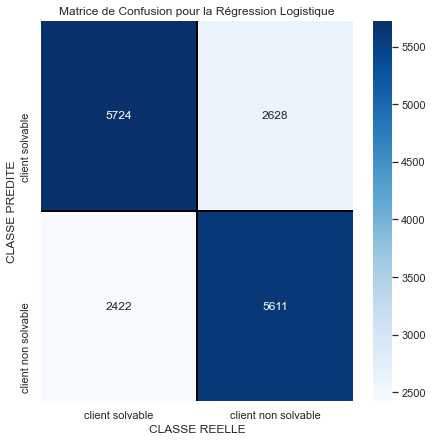

In [61]:
cm = confusion_matrix(y_test, y_pred)

x_axis_labels = ["client solvable", "client non solvable"]
y_axis_labels = ["client solvable", "client non solvable"]
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black",
            fmt=".0f", ax=ax, cmap="Blues",
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)
plt.xlabel("CLASSE REELLE")
plt.ylabel("CLASSE PREDITE")
plt.title('Matrice de Confusion pour la Régression Logistique')
plt.show()

* Importance des variables dans ce modèle de **Regression Logistique** :

Importance positive des 10 premières variables :

1. variable 4 (3.890693)

2. variable 5 (1.493082)

3. variable 9 (1.235686)

4. variable 79 (0.960006)

5. variable 98 (0.944256)

6. variable 75 (0.851218)

7. variable 215 (0.831719)

8. variable 12 (0.786836)

9. variable 33 (0.766221)

10. variable 96 (0.657117)


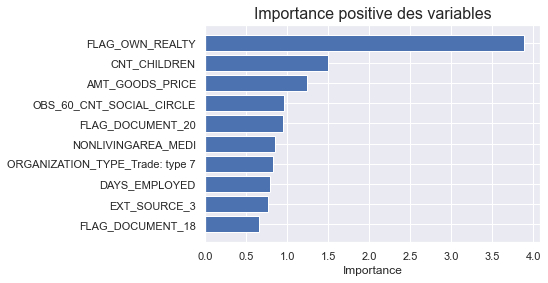

<Figure size 720x720 with 0 Axes>

In [62]:
from matplotlib import pyplot

importance = lr.coef_[0]
indices = np.argsort(importance)[::-1]
print("Importance positive des 10 premières variables :")

for f in range(10):
    print("\n%d. variable %d (%f)" % (f + 1, indices[f],
          importance[indices[f]]))

fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))

ax.barh(range(10), importance[indices[:10]], align='center', color="b")
ax.set_yticks(range(10))
ax.set_yticklabels(data_train.columns[indices])
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title("Importance positive des variables", fontsize=16)
plt.show()

Importance négatives des 10 premières variables :

1. variable 91 (-0.681415)

2. variable 93 (-0.714800)

3. variable 120 (-0.801561)

4. variable 92 (-0.838058)

5. variable 115 (-0.855213)

6. variable 88 (-0.879302)

7. variable 28 (-1.271890)

8. variable 29 (-1.730124)

9. variable 30 (-2.509919)

10. variable 6 (-4.295019)


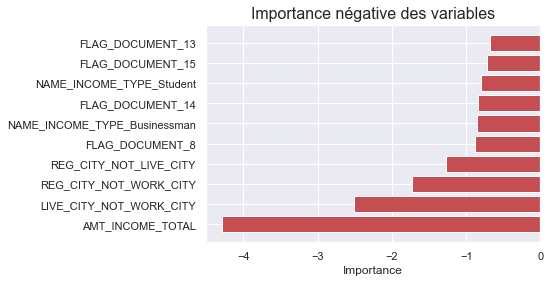

<Figure size 720x720 with 0 Axes>

In [63]:
print("Importance négatives des 10 premières variables :")

for f in range(10):
    print("\n%d. variable %d (%f)" % (f + 1, indices[223 + f],
          importance[indices[223 + f]]))

fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))

ax.barh(range(10), importance[indices[223:]], align='center', color="r")
ax.set_yticks(range(10))
ax.set_yticklabels(data_train.columns[indices[223:]])
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title("Importance négative des variables", fontsize=16)
plt.show()

> <font color='red'>ANALYSE</font>

> <font color='red'> La régression logistique apprend sur des données telles que **FLAG_OWN_REALTY, CNT_CHILDREN, OBS_60_CNT_SOCIAL_CIRCLE, AMT_GOODS_PRICE** qui vont fiabiliser le modèle de scoring.
Des données telles **AMT_INCOME_TOTAL, LIVE_CITY_NOT_WORK_CITY, REG_CITY_NOT_WORK_CITY** vont aussi contribuer à améliorer le modèle.
C'est un résultat qui fait sens car avec plus de revenus, le modèle pourra plus apprendre à décider si le montant permet de rembourser ou pas le prêt.
De même, des informations sur l'environnement familial et le lieu d'habitation permettent d'optimiser les prédictions.</font>

## b) Amélioration de la régression logistique par la recherche des hyperparamètres 

> On va utiliser la validation croisée ainsi que la classe **GridSearchCV** afin de trouver les hyperparamètres permettant d'améliorer l'aire sous la courbe ROC qui est un indicateur de performance.

In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [65]:

lr = LogisticRegression(solver='sag', max_iter=1000)
params = {'C': np.logspace(-3, 3, 7), 'penalty':['l2']}

lr_gs = GridSearchCV(lr, params, cv=3, n_jobs=-1,
                     scoring='roc_auc')
lr_gs.fit(X_train_scale, y_train)

print(lr_gs.best_params_)

{'C': 10.0, 'penalty': 'l2'}


In [66]:
# On récupère la prédiction de la valeur positive
y_prob = lr_gs.predict_proba(X_test_scale)[:, 1]
y_pred = lr_gs.predict(X_test_scale)


false_positive_rate, true_positive_rate, thresholds = \
                            roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
f1 = f1_score(y_test, y_pred)
fbeta = fbeta_score(y_test, y_pred, beta=50)
tab_f1.append(f1)
tab_fbeta.append(fbeta)
tab_auroc.append(roc_auc)
print("F-mesure               : {:.4f}".format(f1))
print("F50-mesure             : {:.4f}".format(fbeta))
print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

F-mesure               : 0.6887
F50-mesure             : 0.6970
Aire sous la courbe ROC: 0.7539


> <font color='red'>Il apparait une légère amélioration de l'aire sous la courbe ROC donc de la performance.
Le modèle est déjà entrainé avec les hyperparamètres {'C': 10.0, 'penalty': 'l2'}.</font>

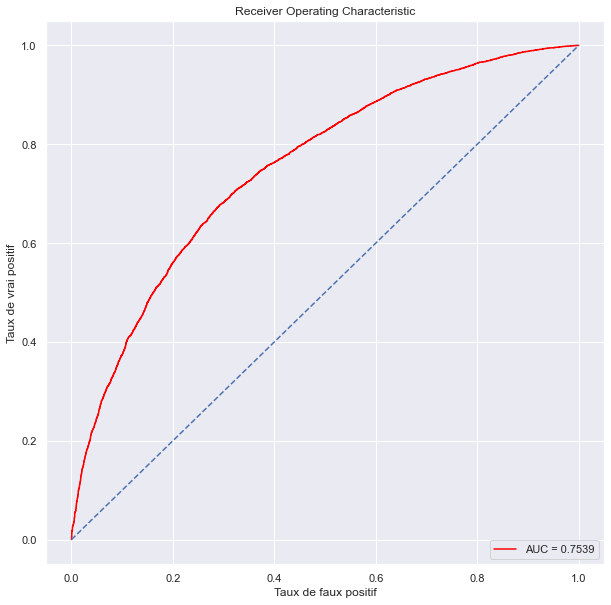

In [67]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

* Classification report pour la régression logistique optimisée :

In [68]:
print("Optimized Logistic Regression Classifier report: \n\n",
      classification_report(y_test, y_pred))

Optimized Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.70      0.69      0.69      8352
           1       0.68      0.70      0.69      8033

    accuracy                           0.69     16385
   macro avg       0.69      0.69      0.69     16385
weighted avg       0.69      0.69      0.69     16385



* Matrice de confusion pour la régression logistique optimisée :

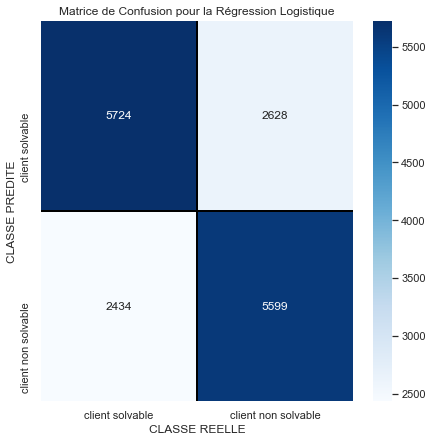

In [69]:
cm = confusion_matrix(y_test, y_pred)

x_axis_labels = ["client solvable", "client non solvable"]
y_axis_labels = ["client solvable", "client non solvable"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black",
            fmt=".0f", ax=ax, cmap="Blues",
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)
plt.xlabel("CLASSE REELLE")
plt.ylabel("CLASSE PREDITE")
plt.title('Matrice de Confusion pour la Régression Logistique')
plt.show()

## c) Test de la performance de plusieurs classifieurs

> On va tester la performance de plusieurs classifieurs.

ADB
best params: {'learning_rate': 0.01, 'n_estimators': 100}
best scores: -0.6586776229157514
Accuracy: 65.5478%
F-mesure               : 0.6554
F50-mesure             : 0.6684
Aire sous la courbe ROC: 0.7081


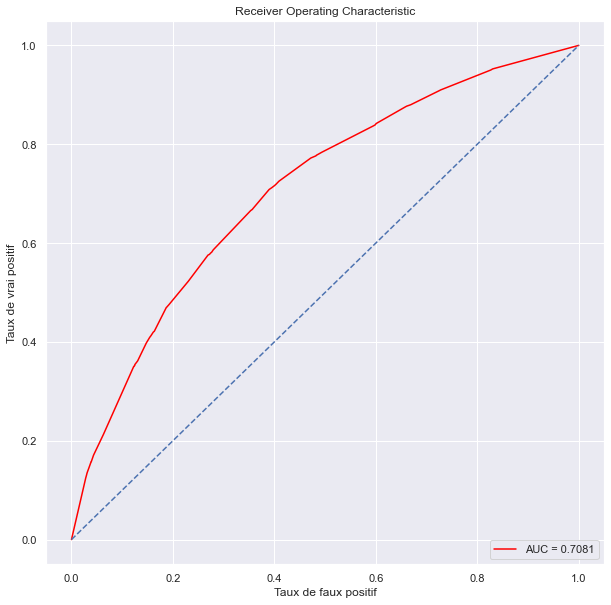

Classifieur report: 

               precision    recall  f1-score   support

           0       0.67      0.64      0.66      8352
           1       0.64      0.67      0.66      8033

    accuracy                           0.66     16385
   macro avg       0.66      0.66      0.66     16385
weighted avg       0.66      0.66      0.66     16385



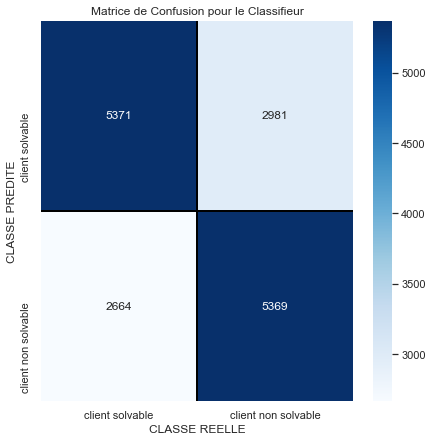

GBC
best params: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
best scores: -0.6266680097836685
Accuracy: 67.2383%
F-mesure               : 0.6665
F50-mesure             : 0.6677
Aire sous la courbe ROC: 0.7318


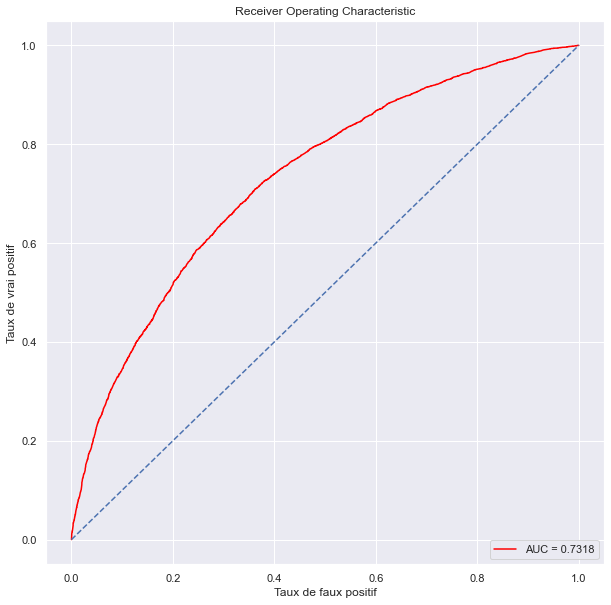

Classifieur report: 

               precision    recall  f1-score   support

           0       0.68      0.68      0.68      8352
           1       0.67      0.67      0.67      8033

    accuracy                           0.67     16385
   macro avg       0.67      0.67      0.67     16385
weighted avg       0.67      0.67      0.67     16385



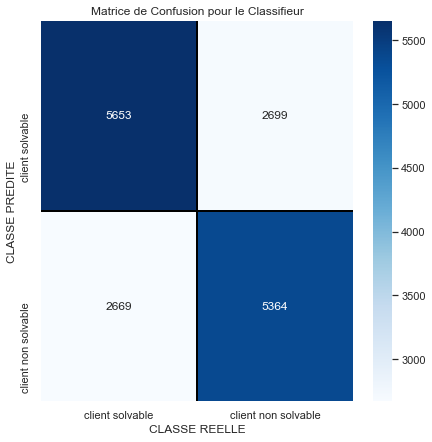

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
best scores: -0.6103228646284493
Accuracy: 68.4284%
F-mesure               : 0.6797
F50-mesure             : 0.6832
Aire sous la courbe ROC: 0.7449


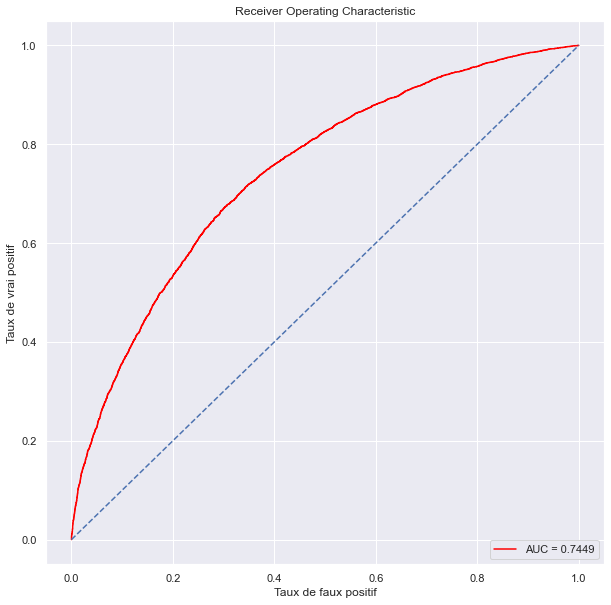

Classifieur report: 

               precision    recall  f1-score   support

           0       0.69      0.69      0.69      8352
           1       0.68      0.68      0.68      8033

    accuracy                           0.68     16385
   macro avg       0.68      0.68      0.68     16385
weighted avg       0.68      0.68      0.68     16385



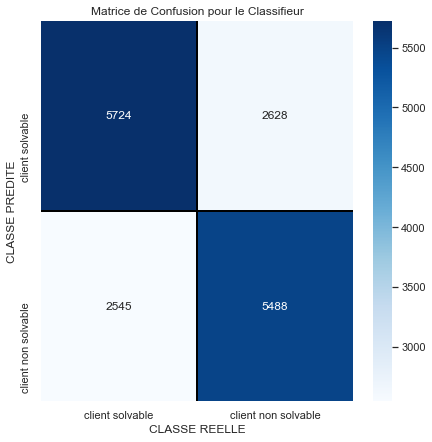

DTC
best params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
best scores: -0.6363716352640147
Accuracy: 65.8773%
F-mesure               : 0.6190
F50-mesure             : 0.5653
Aire sous la courbe ROC: 0.6965


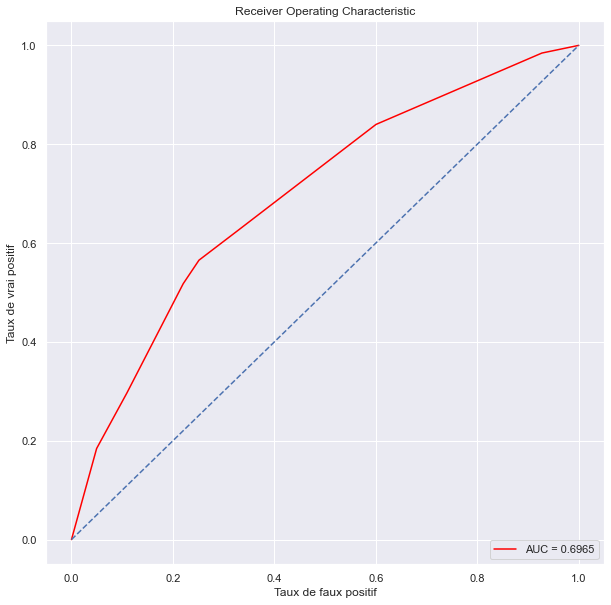

Classifieur report: 

               precision    recall  f1-score   support

           0       0.64      0.75      0.69      8352
           1       0.68      0.57      0.62      8033

    accuracy                           0.66     16385
   macro avg       0.66      0.66      0.66     16385
weighted avg       0.66      0.66      0.66     16385



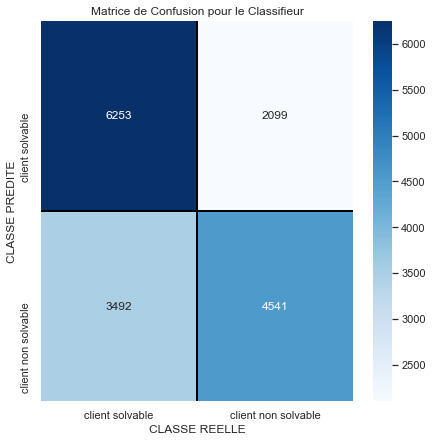

In [70]:

seed = 1
models = [
            'ADB',
            'GBC',
            'RFC',
            'DTC'
         ]
clfs = [
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed, n_jobs=-1),
        DecisionTreeClassifier(random_state=seed)
        ]

params = {
            models[0]:{'learning_rate':[0.01],
                       'n_estimators':[100, 150]},
            models[1]:{'learning_rate':[0.01],
                       'n_estimators':[100, 150],
                       'max_depth':[3],
                       'min_samples_split':[2],
                       'min_samples_leaf': [2]},
            models[2]:{'n_estimators':[100, 150], 
                       'criterion':['gini'],
                       'min_samples_split':[2],
                       'min_samples_leaf': [4]},
            models[3]:{'criterion':['gini'],
                       'max_depth':[3],
                       'min_samples_split':[2],
                       'min_samples_leaf': [4]}
         }
        
        
test_scores = []
coefs       = []
estimation  = []

for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name],
                       scoring='neg_log_loss',
                       refit='True',
                       n_jobs=-1, 
                       cv=4)
    
    clf.fit(X_train_scale, y_train)
    
    print("best params: " + str(clf.best_params_))
    print("best scores: " + str(clf.best_score_))
    
    estimates = clf.predict_proba(X_test_scale)[:, 1]
    acc = accuracy_score(y_test,
                         clf.predict(X_test_scale))
    
    y_pred = clf.predict(X_test_scale)
    print("Accuracy: {:.4%}".format(acc))
    
    test_scores.append((acc,clf.best_score_))
    estimation.append([name, estimates])
    coefs.append([name, clf.best_estimator_.feature_importances_])
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,
                                                                    estimates)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    f1 = f1_score(y_test, clf.predict(X_test_scale))
    fbeta = fbeta_score(y_test, clf.predict(X_test_scale), beta=50)
    tab_f1.append(f1)
    tab_fbeta.append(fbeta)
    tab_auroc.append(roc_auc)
    
    print("F-mesure               : {:.4f}".format(f1))
    print("F50-mesure             : {:.4f}".format(fbeta))
    print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))
    
    plt.figure(figsize=(10, 10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',
             label='AUC = %0.4f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('Taux de vrai positif')
    plt.xlabel('Taux de faux positif')
    plt.show()
    
    print("Classifieur report: \n\n",
      classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    x_axis_labels = ["client solvable", "client non solvable"]
    y_axis_labels = ["client solvable", "client non solvable"]
    f, ax = plt.subplots(figsize =(7,7))
    sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black",
                fmt=".0f", ax=ax, cmap="Blues",
                xticklabels=x_axis_labels,
                yticklabels=y_axis_labels)
    plt.xlabel("CLASSE REELLE")
    plt.ylabel("CLASSE PREDITE")
    plt.title('Matrice de Confusion pour le Classifieur')
    plt.show()
    

* Résumé de la performance en fonction des classifieurs :

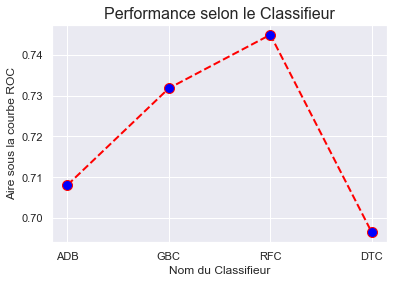

In [100]:
plt.plot(models, [0.7081, 0.7318, 0.7449, 0.6965], color='red',
         linestyle='dashed', linewidth=2,
         markerfacecolor='blue', markersize=10,
         marker='o')
plt.title('Performance selon le Classifieur', fontsize=16)
plt.ylabel('Aire sous la courbe ROC')
plt.xlabel('Nom du Classifieur')
plt.show()

> <font color='red'>ANALYSE</font>

> <font color='red'> On voit bien que le classifier RandomForest présente la meilleure performance à 0.7449 parmi les classifieurs testés. La régression logistique avec les hyperparamètres {'C': 10.0, 'penalty': 'l2'} possède la meilleure performance 0.7539.
</font>

### Importance des variables parmi les différents classifieurs :

* **AdaBoostClassifier** :

Importance des 10 premières variables :

1. variable 30 (0.540000)

2. variable 29 (0.460000)

3. variable 73 (0.000000)

4. variable 85 (0.000000)

5. variable 84 (0.000000)

6. variable 83 (0.000000)

7. variable 82 (0.000000)

8. variable 81 (0.000000)

9. variable 80 (0.000000)

10. variable 79 (0.000000)


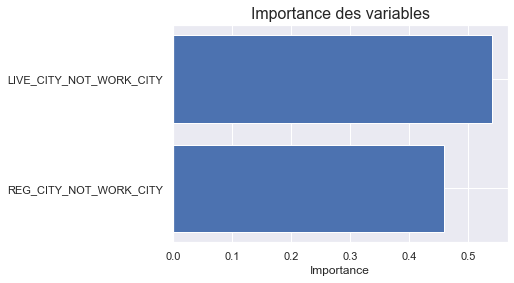

<Figure size 720x720 with 0 Axes>

In [72]:
from matplotlib import pyplot

importance = coefs[0][1]
indices = np.argsort(importance)[::-1]
print("Importance des 10 premières variables :")

for f in range(10):
    print("\n%d. variable %d (%f)" % (f + 1, indices[f],
          importance[indices[f]]))

fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))

ax.barh(range(2), importance[indices[:2]], align='center', color="b")
ax.set_yticks(range(2))
ax.set_yticklabels(data_train.columns[indices])
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title("Importance des variables", fontsize=16)

plt.show()

* **GradientBoostingClassifier** :

Importance des 10 premières variables :

1. variable 30 (0.471345)

2. variable 29 (0.381619)

3. variable 28 (0.067446)

4. variable 9 (0.034389)

5. variable 8 (0.017392)

6. variable 121 (0.012071)

7. variable 104 (0.006979)

8. variable 103 (0.005790)

9. variable 5 (0.001703)

10. variable 7 (0.000908)


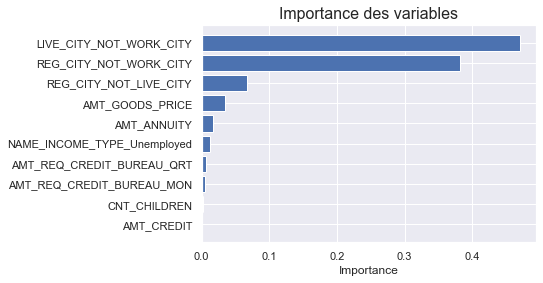

<Figure size 720x720 with 0 Axes>

In [73]:
importance = coefs[1][1]
indices = np.argsort(importance)[::-1]
print("Importance des 10 premières variables :")

for f in range(10):
    print("\n%d. variable %d (%f)" % (f + 1, indices[f],
          importance[indices[f]]))

fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))

ax.barh(range(10), importance[indices[:10]], align='center', color="b")
ax.set_yticks(range(10))
ax.set_yticklabels(data_train.columns[indices])
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title("Importance des variables", fontsize=16)

plt.show()

* **RandomForestClassifier** :

Importance des 10 premières variables :

1. variable 30 (0.090239)

2. variable 29 (0.082869)

3. variable 9 (0.039667)

4. variable 8 (0.037623)

5. variable 28 (0.033861)

6. variable 78 (0.033024)

7. variable 5 (0.031393)

8. variable 11 (0.031152)

9. variable 4 (0.030512)

10. variable 10 (0.030423)


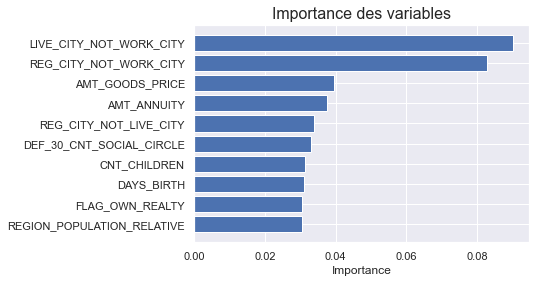

<Figure size 720x720 with 0 Axes>

In [74]:
importance = coefs[2][1]
indices = np.argsort(importance)[::-1]
print("Importance des 10 premières variables :")

for f in range(10):
    print("\n%d. variable %d (%f)" % (f + 1, indices[f],
          importance[indices[f]]))

fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))

ax.barh(range(10), importance[indices[:10]], align='center', color="b")
ax.set_yticks(range(10))
ax.set_yticklabels(data_train.columns[indices])
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title("Importance des variables", fontsize=16)
plt.show()

* **DecisionTreeClassifier** :

Importance des 10 premières variables :

1. variable 30 (0.566804)

2. variable 29 (0.384973)

3. variable 28 (0.028745)

4. variable 103 (0.019479)

5. variable 62 (0.000000)

6. variable 75 (0.000000)

7. variable 86 (0.000000)

8. variable 85 (0.000000)

9. variable 84 (0.000000)

10. variable 83 (0.000000)


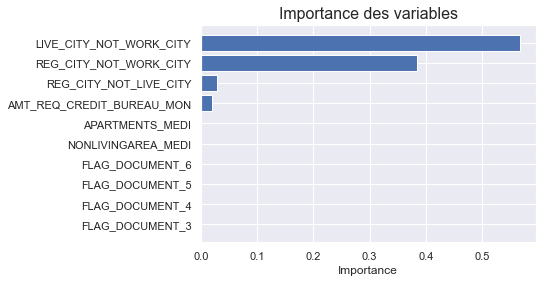

<Figure size 720x720 with 0 Axes>

In [75]:
importance = coefs[3][1]
indices = np.argsort(importance)[::-1]
print("Importance des 10 premières variables :")

for f in range(10):
    print("\n%d. variable %d (%f)" % (f + 1, indices[f],
          importance[indices[f]]))

fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))

ax.barh(range(10), importance[indices[:10]], align='center', color="b")
ax.set_yticks(range(10))
ax.set_yticklabels(data_train.columns[indices])
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title("Importance des variables", fontsize=16)

plt.show()

> <font color='red'>ANALYSE</font>

> <font color='red'> On se rend compte que tous ces modèles optimisés se basent sur des données telles que **LIVE_CITY_NOT_WORK_CITY, REG_CITY_NOT_WORK_CITY, AMT_GOOD_PRICE, AMT_ANNUITY**.
Le modèle le plus performant à savoir le **RandomForestClassifier** apprend donc mieux sur des données concernant la localisation d'habitation du client.
</font>

## d) Utilisation du modèle non linéaire SVM à noyau gaussien

* Hyperparamètre $gamma = 0.01$ avec un noyau gaussien

F-mesure               : 0.6601
F50-mesure             : 0.8401
Aire sous la courbe ROC: 0.6521


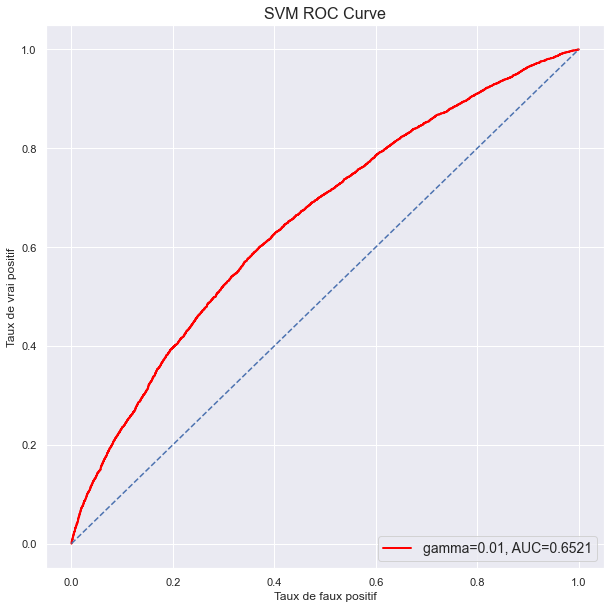

In [76]:
classifier = svm.SVC(kernel='rbf', gamma=0.01,
                     max_iter=800)

classifier.fit(X_train_scale, y_train)

y_test_pred = classifier.decision_function(X_test_scale)
y_pred = classifier.predict(X_test_scale)
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)

auc = metrics.auc(fpr, tpr)
f1 = f1_score(y_test, y_pred)
fbeta = fbeta_score(y_test, y_pred, beta=50)
tab_f1.append(f1)
tab_fbeta.append(fbeta)
tab_auroc.append(auc)
print("F-mesure               : {:.4f}".format(f1))
print("F50-mesure             : {:.4f}".format(fbeta))
print("Aire sous la courbe ROC: {:.4f}".format(auc))

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, '-', lw=2,
         label='gamma=0.01, AUC=%.4f' % auc,
         color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.title('SVM ROC Curve', fontsize=16)

plt.legend(loc="lower right", fontsize=14)
plt.show()

* Classification report pour le SVM gaussien :

In [77]:
print("SVM RBF Classifieur report: \n\n",
      classification_report(y_test, y_pred))

SVM RBF Classifieur report: 

               precision    recall  f1-score   support

           0       0.68      0.32      0.44      8352
           1       0.54      0.84      0.66      8033

    accuracy                           0.58     16385
   macro avg       0.61      0.58      0.55     16385
weighted avg       0.61      0.58      0.55     16385



* Matrice de confusion pour le SVM gaussien :

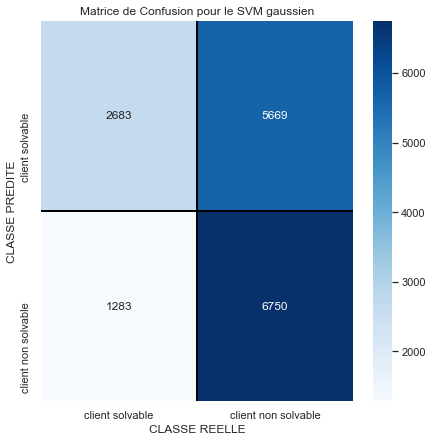

In [78]:
cm = confusion_matrix(y_test, y_pred)

x_axis_labels = ["client solvable", "client non solvable"]
y_axis_labels = ["client solvable", "client non solvable"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black",
            fmt=".0f", ax=ax, cmap="Blues",
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)
plt.xlabel("CLASSE REELLE")
plt.ylabel("CLASSE PREDITE")
plt.title('Matrice de Confusion pour le SVM gaussien')
plt.show()

* On applique la classe GridSearchCV pour trouver les hyperparamètres optimales.

In [79]:
C_range = np.logspace(-1, 1, 3)
gamma_range = np.logspace(-2, 2, 5)

param_grid = {'C': C_range, 'gamma': gamma_range}

score = 'accuracy'

grid = GridSearchCV(svm.SVC(kernel='rbf',
                            max_iter=800),
                    param_grid,
                    cv=3,
                    scoring=score)

grid.fit(X_train_scale, y_train)

print("The optimal parameters are {} with a score  \
       of {:.4f}".format(grid.best_params_, grid.best_score_))

The optimal parameters are {'C': 0.1, 'gamma': 0.1} with a score         of 0.5890


* Affichage des courbes ROC :

F-mesure               : 0.5519
F50-mesure             : 0.5013
Aire sous la courbe ROC: 0.6377


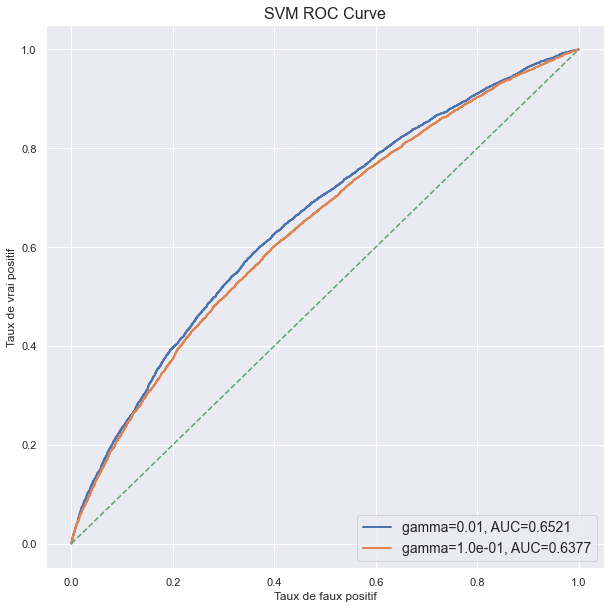

In [80]:
y_test_pred_cv = grid.decision_function(X_test_scale)
y_pred_cv = grid.predict(X_test_scale)

fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(y_test,
                                           y_test_pred_cv)

auc_cv = metrics.auc(fpr_cv, tpr_cv)
f1 = f1_score(y_test, y_pred_cv)
fbeta = fbeta_score(y_test, y_pred_cv, beta=50)
tab_f1.append(f1)
tab_fbeta.append(fbeta)
tab_auroc.append(auc_cv)
print("F-mesure               : {:.4f}".format(f1))
print("F50-mesure             : {:.4f}".format(fbeta))
print("Aire sous la courbe ROC: {:.4f}".format(auc_cv))

fig = plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.4f' % auc)

plt.plot(fpr_cv, tpr_cv, '-', lw=2,
         label='gamma=%.1e, AUC=%.4f' % (grid.best_params_['gamma'],
                                         auc_cv))
plt.plot([0, 1], [0, 1], linestyle='--')

plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.title('SVM ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.show()

* Classification report pour le SVM gaussien optimisé :

In [81]:
print("Report du classifieur SVM RBF optimisé: \n\n",
      classification_report(y_test, y_pred))

Report du classifieur SVM RBF optimisé: 

               precision    recall  f1-score   support

           0       0.68      0.32      0.44      8352
           1       0.54      0.84      0.66      8033

    accuracy                           0.58     16385
   macro avg       0.61      0.58      0.55     16385
weighted avg       0.61      0.58      0.55     16385



* Matrice de confusion pour le SVM gaussien optimisé :

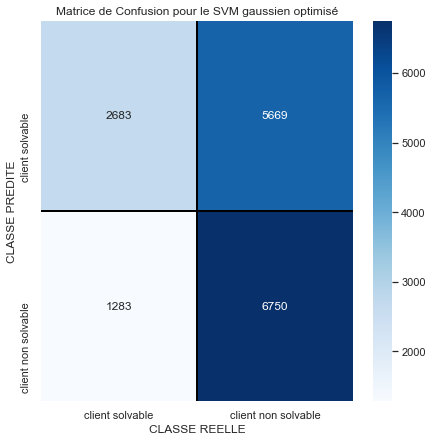

In [82]:
cm = confusion_matrix(y_test, y_pred)

x_axis_labels = ["client solvable", "client non solvable"]
y_axis_labels = ["client solvable", "client non solvable"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black",
            fmt=".0f", ax=ax, cmap="Blues",
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)
plt.xlabel("CLASSE REELLE")
plt.ylabel("CLASSE PREDITE")
plt.title('Matrice de Confusion pour le SVM gaussien optimisé')
plt.show()

## e) Affichage des métriques évaluant le scoring suivant le modèle

* Aire sous la courbe ROC selon le modèle :

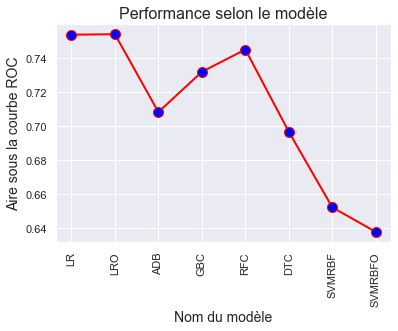

In [83]:
modeles = [ 'LR',
            'LRO',
            'ADB',
            'GBC',
            'RFC',
            'DTC',
            'SVMRBF',
            'SVMRBFO'
         ]

plt.plot(modeles, tab_auroc, color='red',
         linestyle='solid', linewidth=2,
         markerfacecolor='blue', markersize=10,
         marker='o')
plt.title('Performance selon le modèle', fontsize=16)
plt.ylabel('Aire sous la courbe ROC', fontsize=14)
plt.xlabel('Nom du modèle', fontsize=14)
plt.xticks(rotation=90)
plt.show()

* F-mesure :

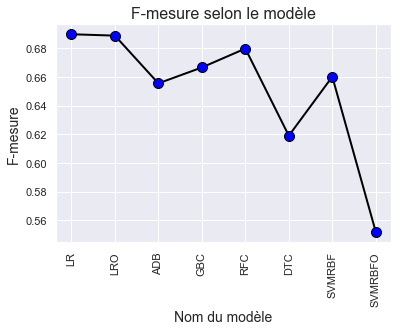

In [84]:
plt.plot(modeles, tab_f1, color='black',
         linestyle='solid', linewidth=2,
         markerfacecolor='blue', markersize=10,
         marker='o')
plt.title('F-mesure selon le modèle', fontsize=16)
plt.ylabel('F-mesure', fontsize=14)
plt.xlabel('Nom du modèle', fontsize=14)
plt.xticks(rotation=90)
plt.show()

* Fbeta-mesure :

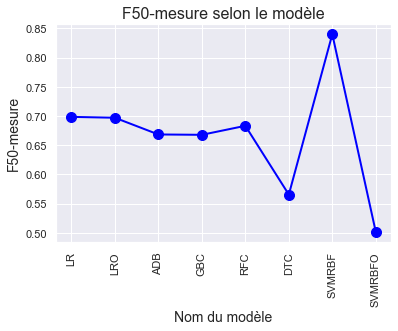

In [85]:
plt.plot(modeles, tab_fbeta, color='blue',
         linestyle='solid', linewidth=2,
         markerfacecolor='blue', markersize=10,
         marker='o')
plt.title('F50-mesure selon le modèle', fontsize=16)
plt.ylabel('F50-mesure', fontsize=14)
plt.xlabel('Nom du modèle', fontsize=14)
plt.xticks(rotation=90)
plt.show()

> <font color='red'>ANALYSE</font>

> <font color='red'> On voit bien que le classifier RandomForest présente une des meilleures performances avec la régression logistique. La régression logistique optimisée avec les hyperparamètres **{'C': 10.0, 'penalty': 'l2'}** possède la meilleure performance 0.7539.
</font>

> <font color='red'> La **F-mesure** qui consitute la moyenne harmonique des rappels et des précisions du modèle avec le même poids, indique de meilleurs valeurs pour la **régression logistique, la régression logistique optimisée et le RandomForest**.
</font>

> <font color='red'> La **F50-mesure** qui consitute la moyenne harmonique des rappels et des précisions du modèle avec un poids plus élevé sur les rappels car on souhaite maximiser le taux de vrai positif et pénaliser la non détection. En effet, pour la classe 0, il faut minimiser le taux de faux négatif à savoir les clients avec une prédiction de 0 alors que leur vraie classe est 1. Le fait d'augmenter le rappel (recalls) va éviter à la banque de perdre de l'argent (somme prêté, frais judiciaires, frais administratifs, ...) mais aussi des clients dans le cas ou le modèle prédit la classe 1 (client non solvable) alors que sa clase réelle est 0 (client solvable).
</font>

## f) Peut-on améliorer la régression logistique avec les variables polynomiales


In [86]:
data_train_poly.head()

,SK_ID_CURR,TARGET_x,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET_y
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.009637,-654.152107,0.005108,-346.733022,2.353667e+07,0.002707,-183.785678,1.247560e+07,-8.468590e+11,1
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.207254,-6491.237078,0.178286,-5583.975307,1.748916e+08,0.153368,-4803.518937,1.504475e+08,-4.712058e+12,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.225464,-5885.942404,0.295894,-7724.580288,2.016572e+08,0.388325,-10137.567875,2.646504e+08,-6.908939e+12,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.226462,-8040.528832,0.186365,-6616.894625,2.349331e+08,0.153368,-5445.325225,1.933364e+08,-6.864416e+12,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.055754,-2076.117157,0.092471,-3443.335521,1.282190e+08,0.153368,-5710.929881,2.126570e+08,-7.918677e+12,0


* Imputation des valeurs manquantes par la médiane des différentes variables :

In [87]:
train_poly_labels = data_train_poly['TARGET_x']
if 'TARGET_x' in data_train_poly:
    train_poly = data_train_poly.drop(columns=['TARGET_x'])
else:
    train_poly = data_train_poly.copy()

features = list(train_poly.columns)

imputer = SimpleImputer(strategy='median')
imputer.fit(train_poly)
train_poly = imputer.transform(train_poly)

* Elimination des variables avec une variance nulle. Cela permet de sélectionner uniquement les variables utiles afin d'améliorer l'efficacité de notre modèle:

In [88]:
from sklearn.feature_selection import VarianceThreshold
from collections import Counter

colonnes = []


def feature_selection(train_instances):


    print('Sélection des variables ...')
    selector = VarianceThreshold()
    selector.fit(train_instances)
    print('Nombre de variables utilisées ... ' +
          str(Counter(selector.get_support())[True]))
    var = list(selector.get_support())
    for count, e in enumerate(var):
        if e == True:
           colonnes.append(data_train_poly.columns[count])

    print('Nombre de variables ignorées ... ' +
          str(Counter(selector.get_support())[False]))
    return selector

fs = feature_selection(train_poly)
train_poly = fs.transform(train_poly)

data_train_poly = pd.DataFrame(train_poly, columns=colonnes)
data_train_poly['TARGET'] = train_poly_labels

Sélection des variables ...
Nombre de variables utilisées ... 278
Nombre de variables ignorées ... 1


* Echantillonnage du jeu de données en sélectionnant le même nombre de lignes avec **TARGET 0** et **TARGET 1**

In [89]:
data_train_1 = data_train_poly[data_train_poly["TARGET"] == 1]
data_train_0 = data_train_poly[data_train_poly["TARGET"] == 0].sample(24825)
data_train_poly = data_train_0.merge(data_train_1, how='outer')

* Normalisation des variables train pour améliorer les résultats du modèle  :

In [90]:

X = data_train_poly.iloc[:, 2:277]

y = data_train_poly.iloc[:, 278]
test_ids = data_train_poly.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33)

scale = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

* Entrainement de la régression logistique avec les variables polynomiales :

In [91]:
tab_f1    = []
tab_fbeta = []
tab_auroc = []

# Inverse du paramètre de régularisation -- > paramètre C
lr = LogisticRegression(max_iter=800)

lr.fit(X_train_scale, y_train)

y_prob_lr = lr.predict_proba(X_test_scale)[:, 1]
y_pred = lr.predict(X_test_scale)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
f1 = f1_score(y_test, y_pred)
fbeta = fbeta_score(y_test, y_pred, beta=50)
tab_f1.append(f1)
tab_fbeta.append(fbeta)
tab_auroc.append(roc_auc)
print("F-mesure               : {:.4f}".format(f1))
print("F50-mesure             : {:.4f}".format(fbeta))
print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

F-mesure               : 0.6875
F50-mesure             : 0.6854
Aire sous la courbe ROC: 0.7494


* Affichage de la courbe ROC :

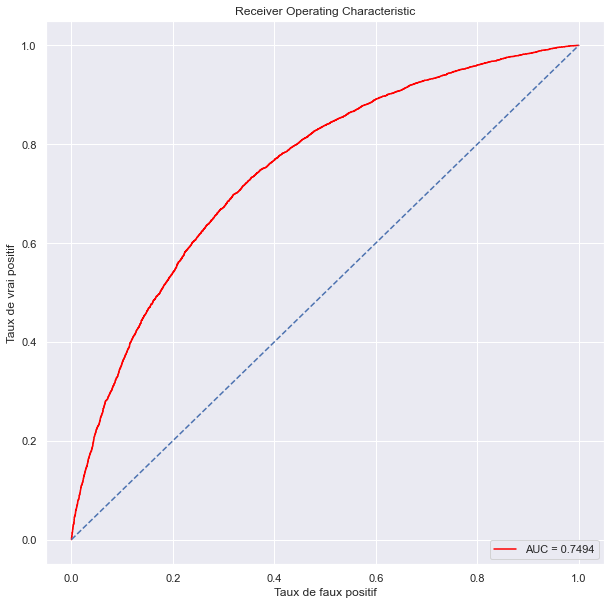

In [92]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

* Classification report pour la régression logistique :

In [93]:
print("Report de la classification par la régression logistique: \n\n",
      classification_report(y_test, y_pred))

Report de la classification par la régression logistique: 

               precision    recall  f1-score   support

           0       0.69      0.69      0.69      8166
           1       0.69      0.69      0.69      8219

    accuracy                           0.69     16385
   macro avg       0.69      0.69      0.69     16385
weighted avg       0.69      0.69      0.69     16385



* Matrice de confusion pour la régression logistique :

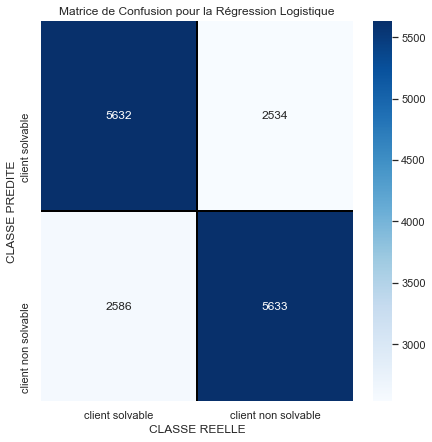

In [94]:
cm = confusion_matrix(y_test, y_pred)

x_axis_labels = ["client solvable", "client non solvable"]
y_axis_labels = ["client solvable", "client non solvable"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black",
            fmt=".0f", ax=ax, cmap="Blues",
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)
plt.xlabel("CLASSE REELLE")
plt.ylabel("CLASSE PREDITE")
plt.title('Matrice de Confusion pour la Régression Logistique')
plt.show()

### On va optimiser la régression logistique en  modifiant les hyperparamètres.

In [95]:
lr = LogisticRegression(solver='saga', max_iter=1000)
params = {'C': np.logspace(-3, 3, 7), 'penalty':['l2']}

lr_gs = GridSearchCV(lr, params, cv=3, n_jobs=-1,
                     scoring='roc_auc')
lr_gs.fit(X_train_scale, y_train)

print(lr_gs.best_params_)

{'C': 100.0, 'penalty': 'l2'}


* Affichage de la métrique :

In [96]:
# On récupère la prédiction de la valeur positive
y_prob = lr_gs.predict_proba(X_test_scale)[:, 1]
y_pred = lr_gs.predict(X_test_scale)


false_positive_rate, true_positive_rate, thresholds = \
                            roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
f1 = f1_score(y_test, y_pred)
fbeta = fbeta_score(y_test, y_pred, beta=50)
tab_f1.append(f1)
tab_fbeta.append(fbeta)
tab_auroc.append(roc_auc)
print("F-mesure               : {:.4f}".format(f1))
print("F50-mesure             : {:.4f}".format(fbeta))
print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

F-mesure               : 0.6888
F50-mesure             : 0.6860
Aire sous la courbe ROC: 0.7510


* Affichage de la courbe ROC

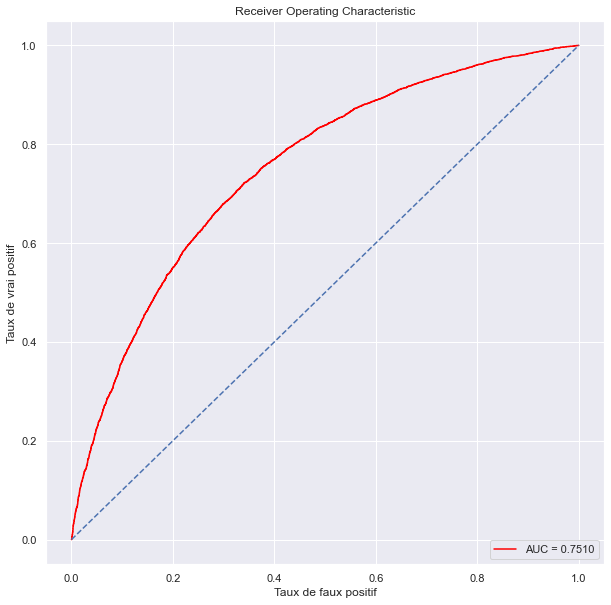

In [97]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

* Report de la classification pour la régression logitique optimisée :

In [98]:
print("Report de la classification par la régression logistique optimisée : \n\n",
      classification_report(y_test, y_pred))

Report de la classification par la régression logistique optimisée : 

               precision    recall  f1-score   support

           0       0.69      0.69      0.69      8166
           1       0.69      0.69      0.69      8219

    accuracy                           0.69     16385
   macro avg       0.69      0.69      0.69     16385
weighted avg       0.69      0.69      0.69     16385



* Matrice de confusion pour la régression logistique optimisée : 

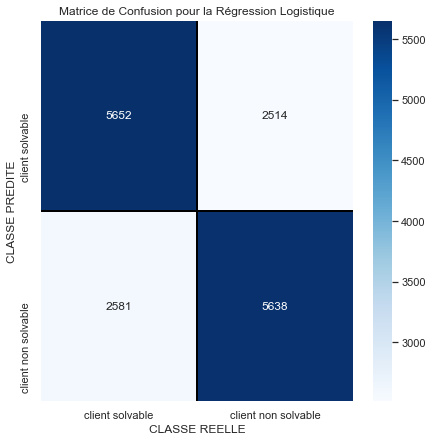

In [99]:
cm = confusion_matrix(y_test, y_pred)

x_axis_labels = ["client solvable", "client non solvable"]
y_axis_labels = ["client solvable", "client non solvable"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black",
            fmt=".0f", ax=ax, cmap="Blues",
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)
plt.xlabel("CLASSE REELLE")
plt.ylabel("CLASSE PREDITE")
plt.title('Matrice de Confusion pour la Régression Logistique')
plt.show()